# The Local Cluster Survey I: Probing Gas Stripping in Nearby Groups and Clusters

## PAPER 1 

* Present analysis procedure
    * simulation results
* Limit analysis to blue galaxies; no AGN included
* calculate size as $R_e(24)/R_e(R)$, where $R_e(r)$ is the GIM2D scale length FOR THE DISK ONLY.
* statistics on size
* Size of blue galaxies vs.
    * stellar mass -  
    * B/T - correlated
    * local density or $\Delta r$ - correlated

** RESULTS ** 

* size of SF region is smaller than stellar disk
* size is correlated with B/T (2.5 - 3$\sigma$)
* size is also correlated with local density and projected radius
* blue cluster galaxies have smaller size ratios, and this is not explained just with $B/T$ because field and cluster sample have similar distributions of $B/T$.  
* This indicates that the relative size of the SF region is linked with structural property of galaxies, but there is an additional impact of environment.

## PAPER 2

Add SFRs to analysis.  Focus on size, stellar mass, SFR relation

* field/cluster samples are comparable in terms of stellar mass, B/T, SFR
* cluster galaxies have smaller size
* cluster and field galaxies are still consistent with the SF main sequence

** RESULTS ** 

* blue galaxies in dense environments have sSFRs that are consistent with the SF main sequence despite having more centrally-concentrated SF disks.
* starburst galaxies have more centrally-concentrated SF disks when compared with galaxies on the SF main sequence, and relative size of SF disk does not appear to vary with environment for these galaxies.
* Coma has an unusually high fraction of starburst galaxies

In [4]:
import numpy as np
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

## The Local Cluster Survey Sample

In [2]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

Running on Rose's mac pro
Running on Rose's mac pro or laptop
Running on Rose's mac pro or laptop
--------------------------------------------------
Date: Tue Aug  1 16:32:05 2006
User: elbaz
Host: 251-198.ipac.caltech.edu
--------------------------------------------------
Format: 9
Architecture: ppc
Operating System: darwin
IDL Version: 6.1
--------------------------------------------------
Successfully read 14 records of which:
 - 10 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - nulnu_iras25 [<type 'numpy.ndarray'>]
 - nulnuinlsun [<type 'numpy.ndarray'>]
 - nulnu_iras100 [<type 'numpy.ndarray'>]
 - nulnu_iras12 [<type 'numpy.ndarray'>]
 - lir_sanders [<type 'numpy.ndarray'>]
 - nulnu_iras60 [<type 'numpy.ndarray'>]
 - lir [<type 'numpy.ndarray'>]
 - nulnu_lw3 [<type 'numpy.ndarray'>]
 - nulnu_lw2 [<type 'numpy.ndarray'>]
 - lambda [<type 'numpy.ndarray'>]
---

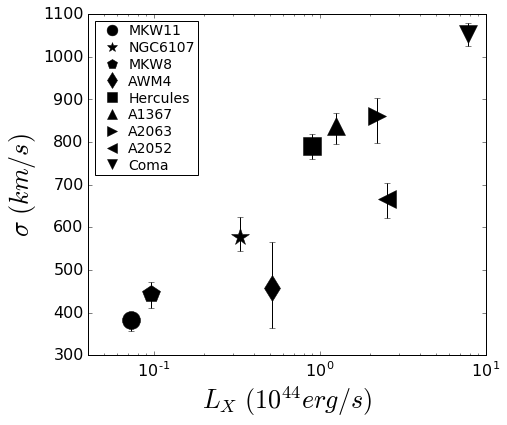

In [3]:
# updating sigma vs LX to include errorbars on sigma values
plotsigmaLx()

## Velocity Dispersion and Redshifts

In [144]:
%run ~/Dropbox/pythonCode/LCSbiweight.py

MKW11
Coma


In [145]:
getbiweightall()

A1367 0.836817006933
     A1367: center=  6505 ( 6505) + 54- 55 scale=  838 ( 838) + 35- 41
MKW11 1.01917934004
     MKW11: center=  6904 ( 6904) + 42- 48 scale=  383 ( 383) + 21- 30
Coma 1.0126710561
      Coma: center=  7011 ( 7011) + 41- 43 scale= 1054 (1054) + 24- 30
MKW8 0.866776259608
      MKW8: center=  8039 ( 8039) + 43- 41 scale=  443 ( 443) + 35- 31
NGC6107 0.766688962335
   NGC6107: center=  9356 ( 9397) + 60- 55 scale=  578 ( 578) + 47- 36
AWM4 0.741169392254
      AWM4: center=  9604 ( 9604) + 56- 57 scale=  458 ( 458) +102-101
A2063 0.676215337666
     A2063: center= 10410 (10410) + 60- 80 scale=  862 ( 862) + 41- 63
A2052 0.666097409002
     A2052: center= 10431 (10431) + 60- 63 scale=  666 ( 666) + 36- 51
Hercules 0.64007516195
  Hercules: center= 10917 (10917) + 52- 53 scale=  790 ( 790) + 27- 31


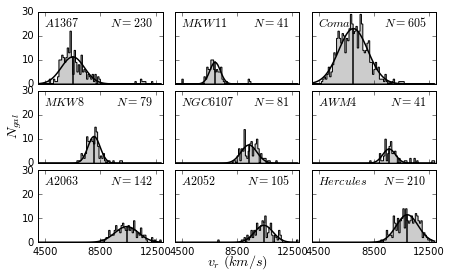

In [146]:
plotall()

## Calculating Local Galaxy Density

Bianca asked about the specifics of how I calculate local density.  I need to dig through code to figure out exactly what I do.

Looks like I calculate local density in 

    LCSwritemasterNSA.py
    
The local density measurements are written to 

    homedir+'research/LocalClusters/NSAmastertables/LocalDensityTables/'+self.prefix+'_localdensity.fits'
    
    
These are read by 

    LCSReadmasterBaseNSA.py
    
as self.ld

When the columns are merged: 

    LCSmergespiralcats.py
    
    calls  
    
    LCSReadmasterBaseNSA.py
    
for each cluster and the following columns are added to the merged table

    ld_columns=['SIGMA_NN','SIGMA_5','SIGMA_10','RHOMASS']
    
    
The local density measurements use the SDSS spectroscopic sample, so all $r < 17.7$ galaxies are included.  It would be more appropriate to use an absolute magnitude cut because we are sampling clusters at a range of redshifts.  Using the apparent magnitude cut will make Coma's local density measurements greater than Hercules, just because of the different distances to each cluster.  **Therefore, I should redo the local density cuts and use an absolute r-band magnitude cut.**

The appropriate absolute magnitude cut is $M_r$ that corresponds to $r=17.7$ at Hercules.  I already refer to this in the paper.

*The stellar mass limit is determined
primarily by the SDSS spectroscopic limit of $r=17.7$.  This
corresponds to an absolute magnitude of $M_r = -22.3$ at the
distance to Hercules ($m-M=35.97$), our furthest cluster.*

Therefore, I should use $M_r = -22.3$ cut when calculating local density.

Checking distance modulus.  

$$ m_2 - m_1 = 2.5 \log_{10}(f_1/f_2) $$

$$ m - M = 2.5 \log_{10}\left( \frac{L}{4 \pi (10~pc)^2} \frac{4 \pi d_{pc}^2}{L} \right) $$

$$ m - M = 5 \log_{10} (d_{pc}) - 5 $$

For Hercules, $z = 0.037$ and 

$$ d_{Mpc} = z * c /H_0  = (0.037)(3.e5)/(70~km/s/Mpc) = 158.6~Mpc$$

Thus 

$$ m - M = 5 \log_{10} (158.6e6) - 5 = 36.00 $$

To get the absolute magnitude corresponding to $r = 17.7$

$$ M = m - 36 = 17.7 - 36 = -18.3 $$


Run:

    LCSCalcLocalDensity.py -m -18.3 -v 2500
    
    LCSmergespiralcats.py -r
    mergedata()
    s=spirals()
    
    

## Sample Selection


Describe how sample is reduced to final sample.

In [19]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py  --diskonly 1

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%


/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:345: RuntimeWarning: invalid value encountered in divide
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:345: RuntimeWarning: invalid value encountered in log10
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:345: RuntimeWarning: invalid value encountered in greater
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:347: RuntimeWarning: invalid value encountered in divide
  self.AGNKEWLEY= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.47)+1.19)) | (

PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


In [116]:
flag = np.ones(len(s.s.RA),'bool')
print 'starting sample size        = ',len(s.s.RA)
flag = flag & s.lirflag
print 'sample size after lir cut   = ',sum(flag)
flag = flag & ~s.agnflag
print 'sample size after agn cut   = ',sum(flag)
flag = flag & s.sizeflag
print 'sample size after size cut   = ',sum(flag)
#flag = flag & s.massflag
#print 'sample size after mass cut  = ',sum(flag)
flag = flag & (s.galfitflag & ~s.badfits)
print 'sample with successful galfit models = ',sum(flag)


f = flag


#flag = flag & s.s['matchflag'] 
#print 'sample size after gim2d cut = ',sum(flag)

#flag = flag & s.sbflag
#print 'sample size after surface brightness cut  = ',sum(flag)

# why do we loose 100 galaxies based in gim2d cut?
# how many are in SDSS but don't have gim2d data?

print 'ASIDE: number of SDSS galaxies without gim2d fit = ',sum((s.s.ISDSS > -1) & ~s.s['matchflag'])
#print 'NSAID of SDSS galaxies without gim2d match: ',s.s.NSAID[(s.s.ISDSS > -1) & ~s.s['matchflag']] 


flag = flag & s.gim2dflag
print 'sample size after gim2d cut = ',sum(flag)

#flag = flag & s.massflag
#print 'sample size after mass cut  = ',sum(flag)

#print 'galaxies that meet all criteria but have galfitflag = False'
#t = f & (s.sb_obs < 20) & ~s.galfitflag
#c = s.s.CLUSTER[t]
#nsa = s.s.NSAID[t]
#for i in range(len(c)):
#    print c[i],nsa[i]


#flag = flag & s.galfitflag & (s.s.fcre1/s.s.fcre1err > .5)
print 'sample size after galfit cut = ',sum(flag)
#flag = flag & s.blueflag2
#print 'sample size after color cut = ',sum(flag)
print '\t cluster galaxies   = ',sum(flag & s.membflag)
print '\t field galaxies     = ',sum(flag & ~s.membflag)
print ''
print 'number of galaxies with galfit model but not B/T',sum(s.galfitflag & ~s.gim2dflag)# & ~s.agnflag)



starting sample size        =  1800
sample size after lir cut   =  541
sample size after agn cut   =  350
sample size after size cut   =  333
sample with successful galfit models =  254
ASIDE: number of SDSS galaxies without gim2d fit =  127
sample size after gim2d cut =  210
sample size after galfit cut =  210
	 cluster galaxies   =  113
	 field galaxies     =  97

number of galaxies with galfit model but not B/T 78


In [58]:
# number of galaxies that should be fit with galfit
print sum(s.lirflag & ~s.agnflag & s.sizeflag & s.massflag)

# number of these that fall below sb cut
print sum(s.lirflag & ~s.agnflag & s.sizeflag & s.massflag & (s.sb_obs > 20.))
# number of these with sucessful galfit fits
print sum(s.lirflag & ~s.agnflag & s.sizeflag & s.massflag& s.galfitflag)

# number of these with B/T fits
print sum(s.lirflag & ~s.agnflag & s.sizeflag & s.massflag & s.galfitflag & s.gim2dflag)

print 'fraction with B/T = ', 189./234
print 'number that are missing B/T = ',234-189

312
32
243
199
fraction with B/T =  0.807692307692
number that are missing B/T =  45


In [55]:
# print ids of galaxies that meet selection criteria but have galfitflag = 0
flag = s.lirflag & ~s.agnflag & s.sizeflag & s.massflag & ~s.galfitflag & (s.sb_obs < 20.)
index = np.arange(len(s.s.RA))[flag]
for i in index:
    print s.s.CLUSTER[i],s.s.NSAID[i]

MKW11 70587
MKW11 70588
MKW11 78100
MKW11 143529
NGC6107 43791
NGC6107 43814
NGC6107 43835
NGC6107 69593
NGC6107 69615
NGC6107 69625
NGC6107 69673
MKW8 18098
MKW8 18307
AWM4 68341
AWM4 82134
Hercules 99058
Hercules 99495
Hercules 99500
Hercules 99505
Hercules 99658
Hercules 99660
Hercules 99675
Hercules 99840
Hercules 99859
Hercules 99872
Hercules 146636
A2063 72633
A2063 72635
A2063 72710
A2063 72749
A2063 72761
A2063 72799
A2063 72800
A2063 79773
A2063 79839
A2063 146082
A2063 146085
A2063 146130
A2063 166154
A2052 72461
A2052 72709
A2052 72710
A2052 72715
A2052 72720
A2052 79378
A2052 79394
A2052 79416
A2052 79591
A2052 79608
A2052 79624
A2052 79632
A2052 79671
A2052 79678
A2052 146018
A2052 146022
A2052 166051
Coma 89109
Coma 103613
Coma 103921
Coma 142717
Coma 142871
Coma 162792


# Galaxies with no B/T Fit

Want to see if there is anything systematic about the galaxies that have no B/T fit.  

Could use sersic index instead of B/T, and normalize by Re rather than Re disk.  I will make this change if the referee requests it.  Otherwise, I will just say that it doesn't affect our results.

number of galaxies that meet all selection criteria, have galfit model, but not B/T 43
number of galaxies that meet all selection criteria, have galfit model, AND B/T 198
KS Test:
D =   0.40
p-vale = 0.00002 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   8.46
p-vale = 0.00032 (prob that samples are from same distribution)
Spearman Rank Test:
rho =   0.88
p-vale = 0.00000 (prob that samples are uncorrelated)


(0.88392847776412964, 0.0)

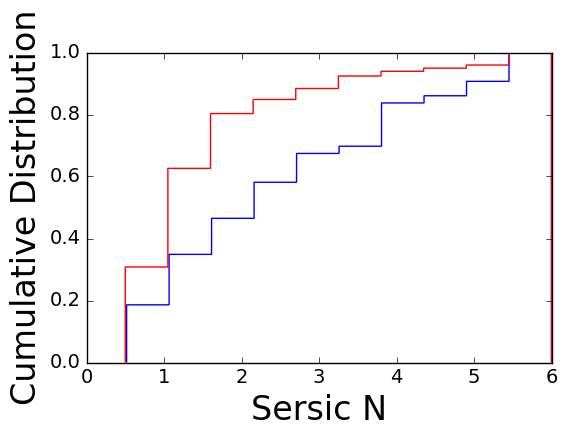

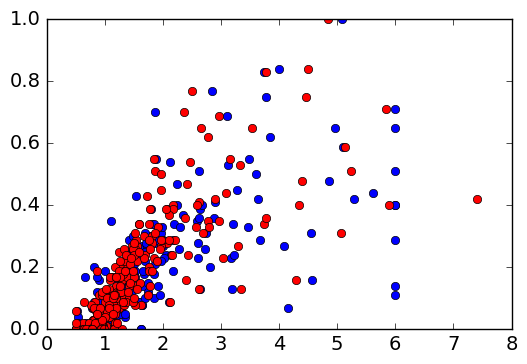

In [22]:
flag = np.ones(len(s.s.RA),'bool')
#print 'starting sample size        = ',len(s.s.RA)
flag = flag & s.lirflag
#print 'sample size after lir cut   = ',sum(flag)
flag = flag & ~s.agnflag
#print 'sample size after agn cut   = ',sum(flag)
flag = flag & s.sizeflag
#print 'sample size after size cut   = ',sum(flag)
flag = flag & s.massflag
#print 'sample size after mass cut  = ',sum(flag)

noBT = flag & s.galfitflag & ~s.gim2dflag

BT = flag & s.galfitflag & s.gim2dflag
print 'number of galaxies that meet all selection criteria, have galfit model, but not B/T',sum(noBT)
print 'number of galaxies that meet all selection criteria, have galfit model, AND B/T',sum(BT)

# compare sersic index of those with and without BT fits
plt.figure(figsize=(6,4))
plt.hist(s.s.SERSIC_N[noBT],cumulative=True,normed=True,histtype='step',color='blue')
plt.hist(s.s.SERSIC_N[BT],cumulative=True,normed=True,histtype='step',color='red')
ks(s.s.SERSIC_N[BT],s.s.SERSIC_N[noBT])
plt.xlabel('Sersic N')
plt.ylabel('Cumulative Distribution')

# compare sersic N with B/T
plt.figure(figsize=(6,4))
newflag = flag & s.gim2dflag
plt.plot(s.s.SERSIC_N[newflag],s.s.B_T_r[newflag],'bo')
plt.plot(s.s.ng[newflag],s.s.B_T_r[newflag],'ro')
spearman(s.s.ng[newflag],s.s.B_T_r[newflag])
# these are highly correlated.  could use sersic N instead of B/T




### Compare size ratio of those with and without BT fits###

Those without B/T fits tend to have smaller size ratios.  The conclusion is that galaxies without the B/T fit have higher sersic index and smaller size ratios than overall 24um population.  

In [27]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 9. --diskonly 0

%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


KS Test:
D =   0.30
p-vale = 0.00180 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   5.24
p-vale = 0.00300 (prob that samples are from same distribution)


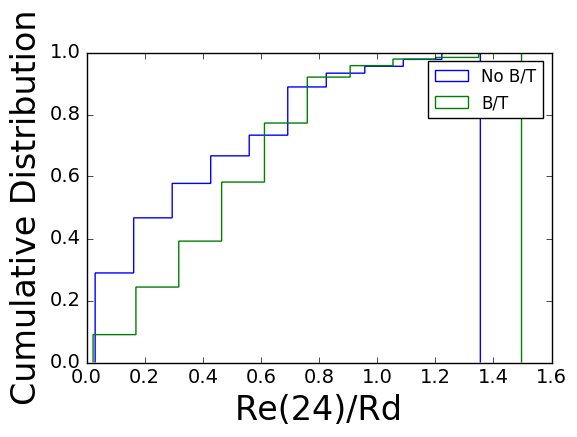

In [28]:
plt.figure(figsize=(6,4))
plt.hist(s.sizeratio[noBT],cumulative=True,normed=True,histtype='step',label='No B/T')
plt.hist(s.sizeratio[BT],cumulative=True,normed=True,histtype='step',label='B/T')
ks(s.sizeratio[BT],s.sizeratio[noBT])
plt.xlabel('Re(24)/Rd')
plt.ylabel('Cumulative Distribution')
plt.legend()

### Print out IDs for Galaxies With No B/T Fits ###

going to send to Luc and see if he can process these while paper is under review.

In [43]:
flag = np.ones(len(s.s.RA),'bool')
#print 'starting sample size        = ',len(s.s.RA)
flag = flag & s.lirflag
#print 'sample size after lir cut   = ',sum(flag)
flag = flag & ~s.agnflag
#print 'sample size after agn cut   = ',sum(flag)
flag = flag & s.sizeflag
#print 'sample size after size cut   = ',sum(flag)
flag = flag & s.massflag
#print 'sample size after mass cut  = ',sum(flag)

noBT = flag  & ~s.gim2dflag

BT = flag & s.galfitflag & s.gim2dflag
print sum(noBT)
# print ID information for galaxies with no B/T fits
# RA DEC RUN CAMCOL FIELD RERUN 
print 'RA            DEC              ISDSS  RUN CAMCOL  FIELD  RERUN'
RA = s.s.RA[noBT]
DEC = s.s.DEC[noBT]
RUN = s.s.RUN[noBT]
CAMCOL = s.s.CAMCOL[noBT]
FIELD = s.s.FIELD[noBT]
RERUN = s.s.RERUN[noBT]
ISDSS = s.s.ISDSS[noBT]

for i in range(len(RA)):
    print '%12.8f %12.8f %10i %4i %6i %6i %6i'%(RA[i],DEC[i],ISDSS[i], RUN[i],CAMCOL[i],FIELD[i],RERUN[i])

64
RA            DEC              ISDSS  RUN CAMCOL  FIELD  RERUN
202.30682373  11.27583885      71830 6174      6     23    301
202.26945496  12.23858547      71885 3836      4    353    301
202.16328430  11.38704872         -1 6174      6     22    301
202.33984375  11.73510456         -1 3836      3    354    301
202.34671021  11.65760040         -1 3805      3    100    301
202.69735718  11.20076466         -1 3805      2    102    301
244.12918091  35.70817184      44702 4629      5    140    301
243.52665710  34.87065125         -1 3964      5    202    301
244.28880310  34.87889481         -1 4629      5    135    301
219.57888794   3.63961458      18701 2190      2    251    301
220.23565674   3.52751732         -1 2190      2    255    301
242.04757690  24.50743866      69479 4002      3    224    301
241.74931335  24.16077232      69482 4002      2    224    301
240.91894531  24.60267639      69495 4002      2    218    301
241.34736633  24.90575027      69537 4002      3    

### Are galaxies without B/T fits more likely to be in cluster or field ###

checking this next.  if they are in the cluster, we might want to go back to normalizing by Re and including all sources.

RESULT: slightly more likely to be cluster member than field, but difference is probably not significant.

In [22]:
print 'GALAXIES WITH B/T FIT'
a = s.membflag[BT]
print 'MEMBFLAG: mean, std = %.2f  +/- %.2f'%(np.mean(a),np.std(a))
print 'GALAXIES WITH NO B/T FIT'
a = s.membflag[noBT]
print 'MEMBFLAG: mean, std = %.2f  +/- %.2f'%(np.mean(a),np.std(a))

GALAXIES WITH B/T FIT
MEMBFLAG: mean, std = 0.53  +/- 0.50
GALAXIES WITH NO B/T FIT
MEMBFLAG: mean, std = 0.60  +/- 0.49


(array([ 229.,  182.,  182.,  185.,  205.,  183.,  146.,   52.,   47.,   54.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

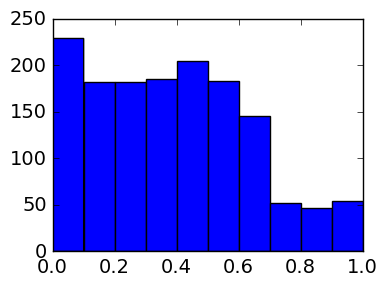

In [25]:
plt.figure(figsize=(4,3))
plt.hist(s.s.B_T_r[s.gim2dflag])
# so luc does fit B/T = 1 

## Looking at Galaxies with Bad GALFIT Fits ##


* MKW11 70588 - point source, but fit is good, galfitflag = True
* MKW11 70630 - cutout too big, made it 100"x100", set r = 2 and n=.4
* MKW11 70639 - bad cutout, fixed size to 100"x100", let BA and PA fit, got good result
* MKW11 70648 - point source, looks like a really good fit. Set n=2, Re = 4, converged w/out error
* MKW11 70657 - cutout too big, set back to +/-100, adjusted parameters a bit and it converged
* MKW11 70685 - cutout too big, set to 100x100, set mag=14, n=.6, r=6 and it converged
* MKW11 70696 - decent fit, set galfitflag = True
* MKW11 70706 - converged w/out error on the first time - hmmm
* MKW11 78100 - can't get it to converge - keep galfitflag = False
* MKW11 143529 - elliptical, can't get to converge - small and faint
* MKW11 143530 - another elliptical, same as above


* NGC6107 43711 - set mag to brighter and it converged - hmmm
* NGC6107 43773 - made mag brighter and initial guess of r = 4
* NGC6107 43780 - cutout was too big, reset size to 60"x60"
* NGC6107 43791 - point source, fit is good, set galfitflag = True
* NGC6107 43814 - contamination from nearby source - leave flag as false
* NGC6107 43835 - cutout is way too big, set cutout size to 80"x80", played around with initial params
* NGC6107 69593 - can't get good fit
* NGC6107 69615 - played around with initial parameters, mag = 14.5, n=2
* NGC6107 69625 - wants to fit a high sersic index, can't get it to converge
* NGC6107 69673 - fit actually looks pretty good.  this is a point source.  set galfitflag = True
* NGC6107 146832 - made cutout smaller (100"x100"), and it converged - elliptical
* NGC6107 146875 - point source, wants to make size less than 1 pix over a large range of starting parameters, set galfitflag = True

* NGC6107 146878 - made cutout (100"x100"), ran and it converged.


* MKW8 18098 - little dwarf, not a great fit - leave as is

* AWM4 68283 - dwarf, started w/bigger mag = 14.5, and it converged
* AWM4 68305 - started w/m=14.5 and converged
* AWM4 82064 - started w/m=14.5 and converged
* AWM4 82134 - very faint and compact, possible confusion w/nearby neighbor, leave out
* AWM4 82170 - set galfitflag = True
* AWM4 82182 - wants to make r small for lots of different initial conditions,set galfitflag = True
* AWM4 82188 - returns to same solution pretty consistently - set galfitflag = True
* AWM4 82192 - super faint; can't even see where model is
* AWM4 82198 - point source; fits give consistently small radii, set galfitflag = True
* AWM4 82209 - affected by nearby source; fixed n=4
* AWM4 146626 - elliptical, cutout is too big; fixed n=4
* AWM4 166693 - very uncertain radius - leave as bad fit

** wrote file **

* Hercules 99037 - started w/brighter magnitude and converged
* Hercules 99058 - central pt source, varied m=14.6, n=2, r=2, keeps convergin to smal radius, set GFF (galfitflag) = True
* Hercules 99478 - set m=14.9, n=1.2, converged
* Hercules 99495 - made 100x100 cutout, not a good fit
* Hercules 99500 - very faint, leave as is
* Hercules 99505 - fit ok
* Hercules 99535 - set m=14.5, fit ok
* Hercules 99658 - can't fit
* Hercules 99660 - wants to converge to small radius, set GFF = True
* Hercules 99675 - set GFF = True
* Hercules 99851 - fit ok with brighter intial mag
* Hercules 99859 - ellip, bright nearby PS  -bad
* Hercules 99872 - ok, potential contam from nearby sources
* Hercules 146636 - faint, compact; wants to fit small radius, set GFF=True
* Hercules 146638 - cutout is too big, elliptical; small radius, set GFF=True
* Hercules 146659 - nice spiral, wants to fit a small radius,set GFF=True

** wrote file **

* A1367 113065 - m=14, n=.4, converged
* A1367 113092 - certainly a point source, set GFF = True; might be reference PSF
* A1367 113095 - ditto - set GFF = True
* A1367 140187 - fit ok after I adjusted mask

** wrote file **


* A2063 72623 - point source, set GFF = True
* A2063 72630 - converged ok w/out changing anything...
* A2063 72631 - point source, set GFF = True
* A2063 72633 - set initial mag=14.5, converged ok, suspect n
* A2063 72635 - faint and compact, leave as is
* A2063 72659 - fit is ok, set GFF = True
* A2063 72710 - suspect but it converged...
* A2063 72717 - too faint - set flag = False
* A2063 72749 - point source, set GFF = true
* A2063 72761 - skip it
* A2063 72778 - bright point source, set GFF = True
* A2063 72782 - set m=14.5 and converged ok
* A2063 72799 - set m=14.5 and converged ok
* A2063 72800 - not a good fit
* A2063 72809 - got a fit
* A2063 79709 - got a fit
* A2063 79779 - clearly a point source, set GFF = True
* A2063 146082 - tough fit, leave as is
* A2063 146085 - embedded early type -skip
* A2063 146121 - point source, set GFF = True
* A2063 146125 - cutout way too big, embedded elliptical, skip
* A2063 146130 - point source, set GFF = True
* A2063 166154 - near a bright pt source, skip
* A2063 166167 - certainly a point source, could set GFF = True



Was using wrong PRF here.  Reset and moving forward.  Not sure why that was set to use mips one.

* A2052 72709 - no source
* A2052 72710 - super faint
* A2052 72715 - ditto
* A2052 79378 - got a good fit
* A2052 79417 - faint, compact, set GFF = True
* A2052 79591 - point source, set GFF = True
* A2052 79608 -  compact, index uncertain, radius is small, set GFF = True
* A2052 79706 - point source, set GFF = True
* A2052 79709 - fit ok on first time with new PFR
* A2052 80769 - point source, set GFF = True
* A2052 80873 - point source, set GFF = True
* A2052 146003 - faint and compact; set GFF = True; radius measurement persists, index very uncertain
* A2052 146018 - point source; elliptical
* A2052 166044 - clearly a point source, set GFF = True
* A2052 166083 - clearly point source, set GFF = True

** wrote file **

* Coma 89063 - point source; good fit, set GFF = True
* Coma 89101 - ditto,  set GFF = True
* Coma 89108 - ditto,  set GFF = True
* Coma 89109 - got it to converge w/m=14.5, r=.5,n=2; cutout size = 11"x100"
* Coma 103613 - barred, ringed spiral; concentrated emission; set GFF = True
* Coma 103627 - embedded elliptical; larger error on Re
* Coma 103921 - wants to be a point source, but nearby bright sources
* Coma 103966 - definitely a pt source; allowed B/A to vary, converged w/out error
* Coma 104115 - extended; converged w/m=14, r=4
* Coma 142552 - cutout too big, elliptical, set size to 100x100; converged
* Coma 142655 - cutout too big due to nearby size, set size to 100x100; m=14, r=4,n=.4, converged
* Coma 142797 - m=14, r=3, let B/A vary, converged
* Coma 142833 - let B/A vary, fixed n=6, converged
* Coma 162740 - fixed mask, played around with initial cond (m=14.5, r=.9,n=.4), converged
* Coma 162792 - point source, good fit, set GFF = True
* Coma 162838 - point source, pretty good fit, let b/a vary, set GFF = True

** wrote file **

## Others ##

* Hercules 99840 - can't get to fit
* Hercules 99644 - bad NSA; contamination by nearby source
* A2052 80878 - converged ok
* A2052 145998 - embedded elliptical - avoid
* A2063 166185 - cutout is too big; reduced size of cutout and it fit ok.
* Coma 142655 - m = 14, r=4, n=.4, fit ok
* Coma 103825 - embedded elliptical - avoid


In [10]:
# trying to get objID for galaxies that don't have B/T fits so Luc can run code
flag = s.galfitflag & ~s.gim2dflag 
names = s.s.NSAID[flag]
ra = s.s.RA[flag]
dec=s.s.DEC[flag]
#for i in range(len(names)):
#    print names[i], ra[i], dec[i]
    
print '%%%%%%%%%%%%'
# trying to get objID for galaxies that don't have B/T fits so Luc can run code
for i in range(len(names)):
    print '%12.8f, %12.8f'%(ra[i], dec[i]) 

%%%%%%%%%%%%
202.37869263,  11.74581909
202.16328430,  11.38704872
202.69735718,  11.20076466
202.16760254,  12.71119785
244.12918091,  35.70817184
244.41893005,  35.00422668
244.35685730,  35.13577271
244.50239563,  35.11030197
244.50468445,  35.26612473
244.72749329,  35.15392685
244.59846497,  35.17430115
244.06069946,  34.25843430
243.60905457,  35.10916519
220.17848206,   3.46542406
219.57888794,   3.63961458
220.54454041,   3.37464857
220.60711670,   3.23197651
220.23565674,   3.52751732
220.24708557,   3.13708782
241.74931335,  24.16077232
241.45658875,  24.17592812
240.91894531,  24.60267639
240.91911316,  24.94860268
241.34736633,  24.90575027
241.29786682,  24.96010208
240.87661743,  24.62224007
240.97689819,  25.01011276
241.50022888,  22.64112473
241.28286743,  17.75767517
241.14916992,  17.72157478
241.38568115,  18.15957069
241.38442993,  18.07888603
241.11134338,  17.75038719
241.29415894,  17.85392570
241.43576050,  17.71557236
241.24867249,  17.87035370
175.99566650,  

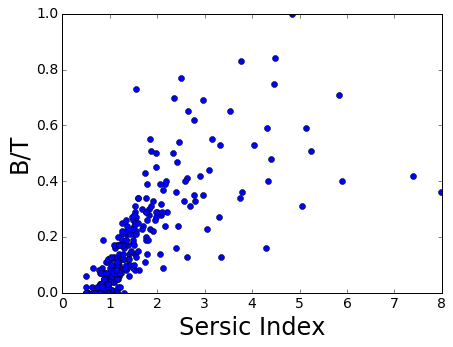

In [19]:
# what about sersic index as proxy for B/T?

plt.figure()
flag = s.gim2dflag & ~s.agnflag & s.lirflag & s.sizeflag
plt.plot(s.s.ng[flag],s.s.B_T_r[flag],'bo')
plt.ylabel('B/T')
plt.xlabel('Sersic Index')

In [21]:
flag = s.galfitflag & s.massflag & s.lirflag & s.sizeflag & ~s.agnflag
spearman(s.s.SERSIC_N[flag],s.sizeratio[flag])
flag = flag & s.gim2dflag
spearman(s.s.B_T_r[flag],s.sizeratio[flag])

Spearman Rank Test:
rho =  -0.30
p-vale = 0.00002 (prob that samples are uncorrelated)
Spearman Rank Test:
rho =  -0.29
p-vale = 0.00015 (prob that samples are uncorrelated)


(-0.28894123435020447, 0.00015247950796037912)

In [22]:
USE_DISK_ONLY

True

## Comparing Field and Cluster Samples

In [65]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --diskonly 1

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


KS test comparing members and field
KS Test:
D =   0.16
p-vale = 0.14336 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.37
p-vale = 0.51425 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.16
p-vale = 0.12088 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.52
p-vale = 0.07616 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.23
p-vale = 0.00590 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   4.58
p-vale = 0.00504 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.14
p-vale = 0.23012 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.65
p-vale = 0.69135 (prob that samples are from same distribution)


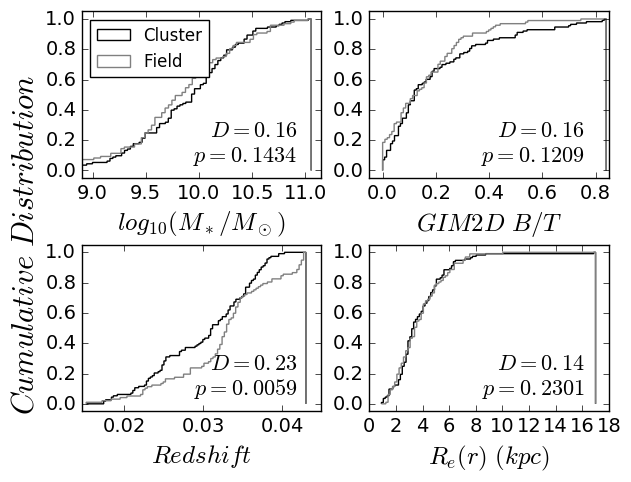

In [66]:
s.compare_cluster_field()

No serious systematics between field and cluster samples except for redshift.

## 24um Image Fits

I updated LCSmaketileplot.py so that a given galaxy wouldn't be repeated when randomly selecting galaxies within a certain range of size ratios (using numpy.random.shuffle).

In [ ]:
# run LCSmaketileplot.py
%run ~/Dropbox/pythonCode/LCSmaketileplot.py

# plot galaxies with size ratios between 0.1 and .3
# 0 < Re(24)/Re(r) < 0.3
paperplots()
#s.plotcolor_subset(size1=0,size2=0.3,showall=False)
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_smallsize.png')
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_smallsize.eps')

# plot galaxies with size ratios between 0.3 and 0.6
# 0.3 < Re(24)/Re(r) < 0.6
#s.plotcolor_subset(size1=0.4,size2=0.6,showall=False)
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_medsize.png')
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_medsize.eps')

# plot galaxies with size ratios greater than 0.75
# 0.75 < Re(24)/Re(r) 
#s.plotcolor_subset(size1=0.75,size2=2,showall=False)
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_largesize.png')
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_largesize.eps')

Could not import aqutil, please see the online PyRAF FAQ
http://www.stsci.edu/institute/software_hardware/pyraf/pyraf_faq#2.6

Limited graphics available on OSX (aqutil not loaded)



SystemExit: 
Your "iraf" and "IRAFARCH" environment variables are not defined and could not
be determined from /usr/local/bin/cl.  These are needed to find IRAF tasks.
Before starting pyraf, define them by doing (for example):

    setenv iraf /iraf/iraf/
    setenv IRAFARCH linux

at the Unix command line. Actual values will depend on your IRAF installation,
and they are set during the IRAF user installation (see iraf.net), or via
Ureka installation (see http://ssb.stsci.edu/ureka).  Also be sure to run the
"mkiraf" command to create a logion.cl (http://www.google.com/search?q=mkiraf).


Traceback (most recent call last):
  File "//anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "//anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 300, in wrapped
Traceback (most recent call last):
  File "//anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Your "iraf" and "IRAFARCH" environment variables are not defined and could not
be determined from /usr/local/bin/cl.  These are needed to find IRAF tasks.
Before starting pyraf, define them by doing (for example):

    setenv iraf /iraf/iraf/
    setenv IRAFARCH linux

at the Unix command line. Actual values will depend on your IRAF installation,
and they are set during the IRAF user installation (see iraf.net), or via
Ureka installation (see http://ssb.stsci.edu/ureka).  Also be sure to run the
"mkiraf" command to create a logion.cl (http://www.google.com/search?q=mkiraf).



As of 1/6/16, need to make one more pass through the sample and remove galaxies that are blended with nearby companion.  Not sure if people think the numbers in each panel are useful.  

Galaxies that are blended with a nearby companion are:

* 99056 - Hercules
* 103927 - Coma
* 103933 (AGN) - Coma
* 140160 - A1367
* 143485 - MKW11
* 146607 - Hercules

*ALSO* running this from ipython and using *paperplots()*.


## Relative size of IR versus Stellar Disk

Changed in May 2016 to normalize the size of the 24um emission using the size of the r-band disk only.  The disk sizes are from Simard+11 B/D decompositions.  The sense of the results are the same, but the average ratio of $R_e(24)/R_e(r)$ is now close to one; when I normalized using $R_e$ from the single-component Sersic fit, the average/median ratio of $R_e(24)/R_e(r) = 0.6-0.7$.

In [86]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --diskonly 1

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


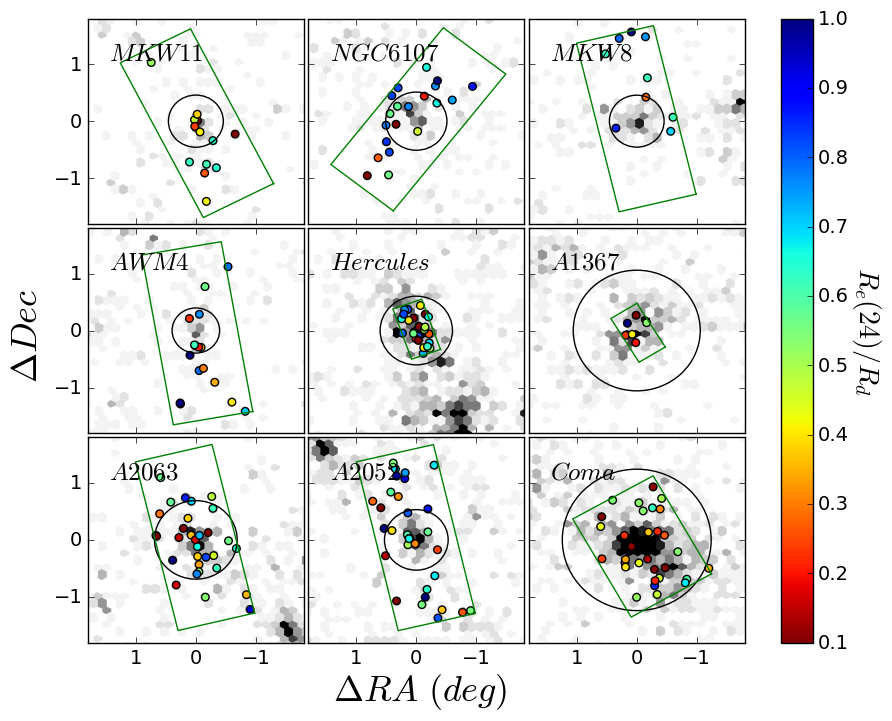

In [70]:
plotpositionson24()

flag =  6 7 5
number of upper limits =  0
flag =  8 12 3
number of upper limits =  0
flag =  2 7 2
number of upper limits =  0
flag =  6 10 4
number of upper limits =  0
flag =  24 0 0
number of upper limits =  0
flag =  6 0 4
number of upper limits =  0
flag =  22 10 0
number of upper limits =  0
flag =  9 22 5
number of upper limits =  0
flag =  30 1 5
number of upper limits =  0


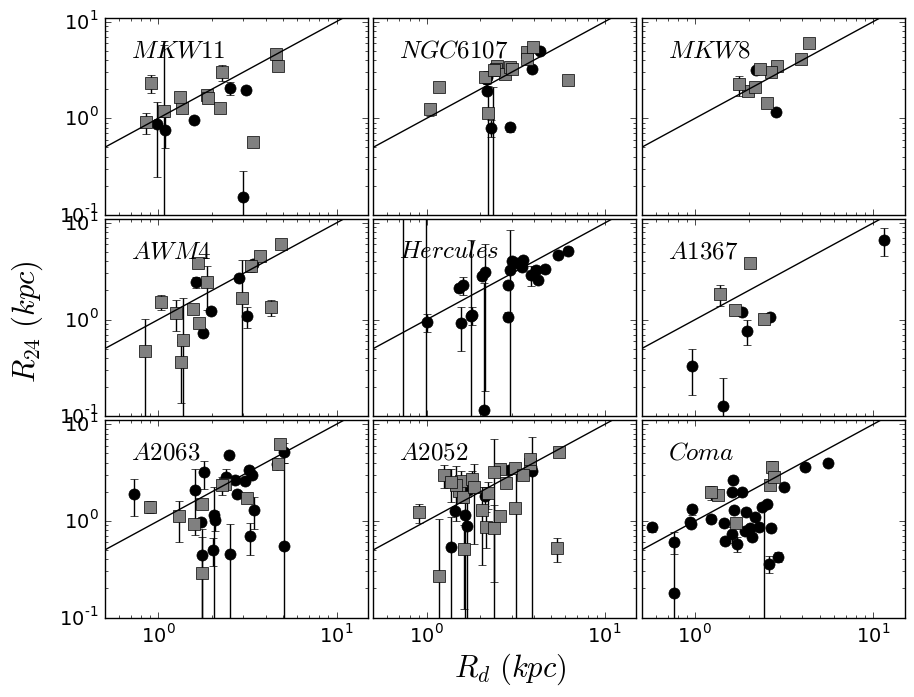

In [87]:
plotRe24vsReall()

comparing cluster and field SF galaxies
KS Test:
D =   0.32
p-vale = 0.00002 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   9.42
p-vale = 0.00018 (prob that samples are from same distribution)


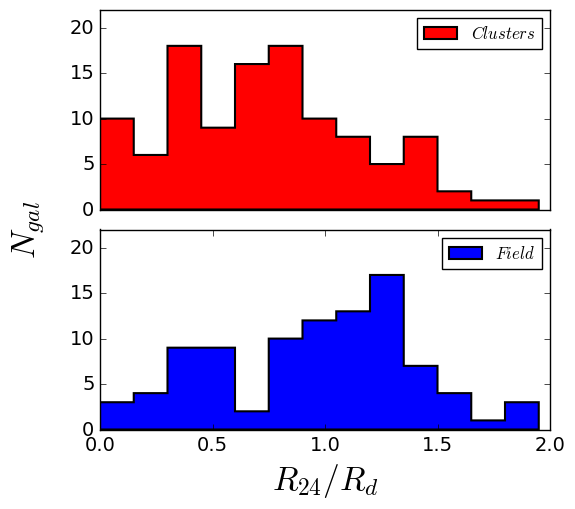

In [73]:
s.plotsizehist(colorflag=True)

comparing cluster and field SF galaxies
KS Test:
D =   0.32
p-vale = 0.00017 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   6.84
p-vale = 0.00093 (prob that samples are from same distribution)


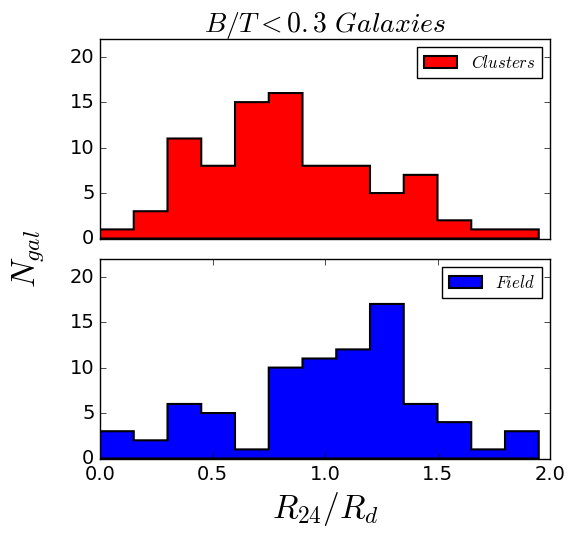

In [74]:
s.plotsizehist(colorflag=True,btcut=.3)

## Statistics on Size ratios of Cluster vs Field ##

In [23]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --diskonly 1 --minmass 9

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%


/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:345: RuntimeWarning: invalid value encountered in divide
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:345: RuntimeWarning: invalid value encountered in log10
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:345: RuntimeWarning: invalid value encountered in greater
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:347: RuntimeWarning: invalid value encountered in divide
  self.AGNKEWLEY= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.47)+1.19)) | (

PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


In [24]:
print 'CLUSTER MEMBERS'
dat = s.sizeratio[s.sampleflag & s.membflag]
print 'size ratio mean (median) +/- std (err mean) = %.2f (%.2f) +/- %.2f (%.2f)'%(np.mean(dat),np.median(dat),np.std(dat),np.std(dat)/np.sqrt(1.*len(dat)))

print 'FIELD GALAXIES'
dat = s.sizeratio[s.sampleflag & ~s.membflag]
print 'size ratio mean (median) +/- std (err mean) = %.2f (%.2f) +/- %.2f (%.2f)'%(np.mean(dat),np.median(dat),np.std(dat),np.std(dat)/np.sqrt(1.*len(dat)))

print 'KS TEST COMPARING CLUSTER AND FIELD'
ks(s.sizeratio[s.sampleflag & s.membflag],s.sizeratio[s.sampleflag & ~s.membflag])





CLUSTER MEMBERS
size ratio mean (median) +/- std (err mean) = 0.77 (0.73) +/- 0.45 (0.05)
FIELD GALAXIES
size ratio mean (median) +/- std (err mean) = 0.95 (0.96) +/- 0.47 (0.04)
KS TEST COMPARING CLUSTER AND FIELD
KS Test:
D =   0.28
p-vale = 0.00054 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   5.21
p-vale = 0.00307 (prob that samples are from same distribution)


(0.27678570151329041, 0.00053776777349412441)

** Looking at Group vs Field as well **

In [25]:
btcut = 1.3
flag = s.sampleflag  & s.membflag & (s.s.B_T_r < btcut)
groupflag = flag & ((s.s.CLUSTER == 'MKW11') | (s.s.CLUSTER == 'MKW8') | (s.s.CLUSTER == 'AWM4') | (s.s.CLUSTER == 'NGC6107'))
clusterflag = flag & ((s.s.CLUSTER == 'Hercules') | (s.s.CLUSTER == 'A1367') | (s.s.CLUSTER == 'A2052') | (s.s.CLUSTER == 'A2063'))
bigmommaflag = flag & (s.s.CLUSTER == 'Coma')

    
fieldflag = s.sampleflag & (s.s.B_T_r < btcut) & ~s.membflag & ~s.dvflag
nearfieldflag = s.sampleflag & (s.s.B_T_r < btcut) & ~s.membflag & s.dvflag


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


In [26]:

#sizegroup = s.sizeratio[groupflag]
print 'CLUSTER MEMBERS'
dat = s.sizeratio[clusterflag | bigmommaflag]
print 'size ratio mean (median) +/- std (err mean) = %.2f (%.2f) +/- %.2f (%.2f)'%(np.mean(dat),np.median(dat),np.std(dat),np.std(dat)/np.sqrt(1.*len(dat)))

print 'GROUP MEMBERS'
dat = s.sizeratio[groupflag]
print 'size ratio mean (median) +/- std (err mean) = %.2f (%.2f) +/- %.2f (%.2f)'%(np.mean(dat),np.median(dat),np.std(dat),np.std(dat)/np.sqrt(1.*len(dat)))


print 'FIELD GALAXIES'
dat = s.sizeratio[fieldflag | nearfieldflag]
print 'size ratio mean (median) +/- std (err mean) = %.2f (%.2f) +/- %.2f (%.2f)'%(np.mean(dat),np.median(dat),np.std(dat),np.std(dat)/np.sqrt(1.*len(dat)))

CLUSTER MEMBERS
size ratio mean (median) +/- std (err mean) = 0.75 (0.72) +/- 0.43 (0.05)
GROUP MEMBERS
size ratio mean (median) +/- std (err mean) = 0.84 (0.81) +/- 0.57 (0.15)
FIELD GALAXIES
size ratio mean (median) +/- std (err mean) = 0.95 (0.96) +/- 0.47 (0.04)


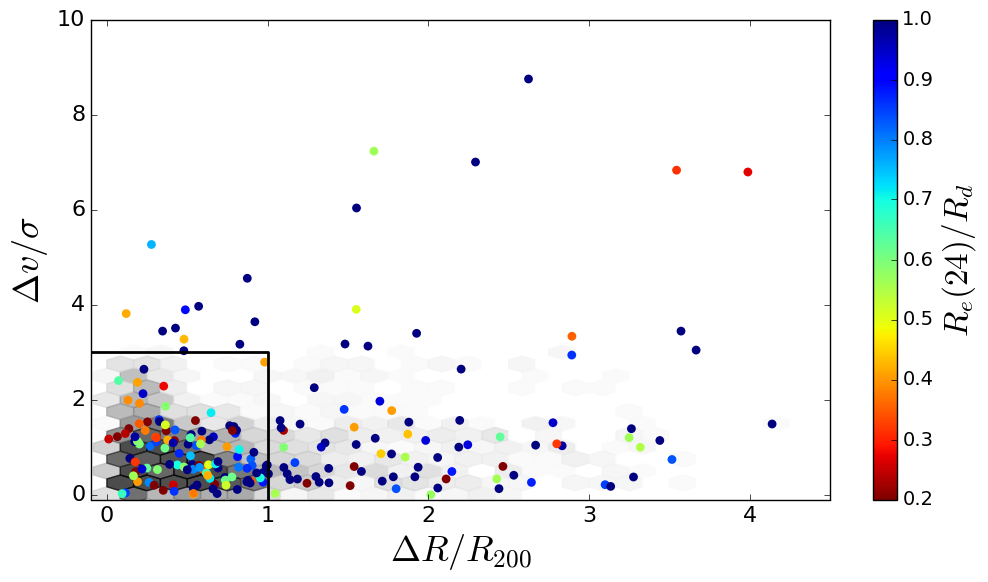

In [80]:
s.plotsizedvdr(plothexbin=True,plotmembcut=True,plotbadfits=False,hexbinmax=40)

## Size vs other galaxy parameters

like mass, B/T, color

mean (median) = -0.24 (-0.24), std =  0.04
confidence interval from sorted list of MC fit values:
lower = -0.28 (-0.28), upper = -0.19 (-0.19)
probability that distribution of slopes is normal =  0.27
[ 1  2  3  2  2  2  1  3  2  2  3  2  1  3  2  1  2  1  3  2  2  3  1  1  1
  2  1  2  2  1  1  2  2  2  1  2  3  2  2  2  3  3  2  2  2  3  1  2  1  2
  2  2  2  1  1  2  2  2  1  3  1  3  2  1  3  3  2  2  1  4  1  1  2  3  2
  2  1  1  2  1  1 -1  1  3  3  2  1  3  0  2  0  2  2  2  2  1  2  1  2  0
  2  1  1  2  1  0  2  2 -1  1  1  2  2]
weighted median =  0.87019476911
weighted median =  0.702589749398
weighted median =  0.594436813311
weighted median =  0.709998897167
weighted median =  1.00896411193
i =  1
ybin[1] =  0.702589749398
ybinerr[1] =  3.90611432576
mean (median) = -0.19 (-0.19), std =  0.05
confidence interval from sorted list of MC fit values:
lower = -0.24 (-0.24), upper = -0.14 (-0.14)
probability that distribution of slopes is normal =  0.49
[ 1  2  4  0  3  3  1  3

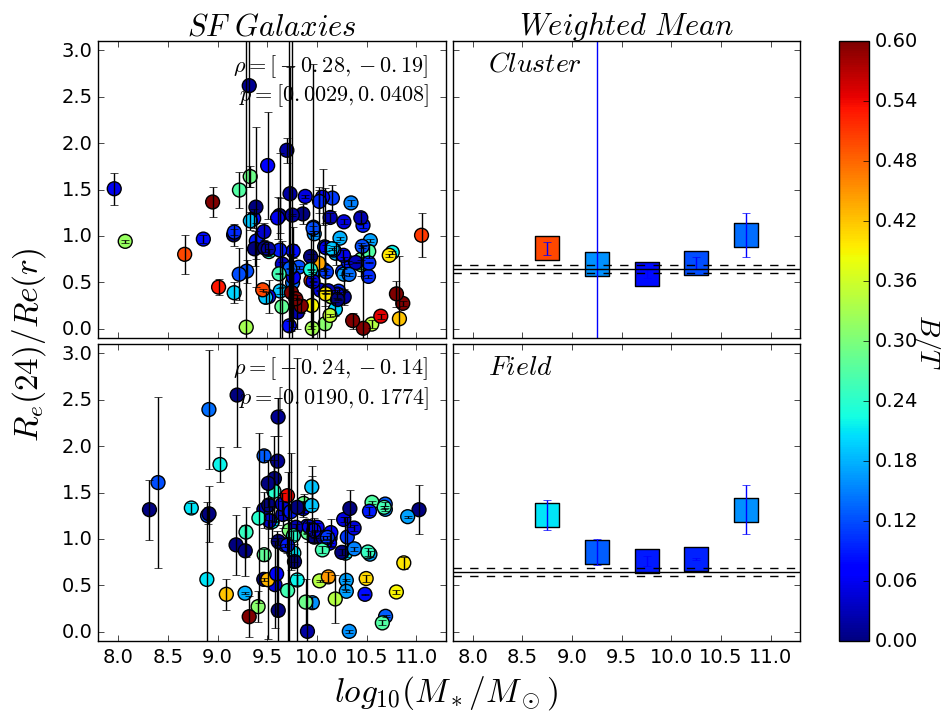

In [81]:
s.plotsizestellarmassblue()

In [82]:
print 'Field size ratios (Re(24)/Re(r)):'
flag=s.sampleflag & ~s.agnflag & ~s.membflag & s.gim2dflag
print 'mean = %5.2f'%(np.mean(s.sizeratio[flag]))
print 'weighted mean = %5.2f'%(ws.weighted_mean(s.sizeratio[flag],weights=1./s.sizeratioERR[flag]))

print 'Cluster size ratios:'
flag=s.sampleflag & ~s.agnflag & s.membflag & s.gim2dflag
print 'mean = %5.2f'%(np.mean(s.sizeratio[flag]))
print 'weighted mean = %5.2f'%(ws.weighted_mean(s.sizeratio[flag],weights=1./s.sizeratioERR[flag]))

Field size ratios (Re(24)/Re(r)):
mean =  1.01
weighted mean =  0.80
Cluster size ratios:
mean =  0.76
weighted mean =  0.65


The right panel shows the weighted mean vs. stellar mass.  The size ratio for cluster galaxies lies below that of the field, but there is no trend between size and stellar mass.


* Need to change this so that the solid and dashed lines show the *weighted* mean for the field.  As of now, they are showing the mean.  

* also need to reset the y axis to reflect the higher size ratios that I get when using the disk size only.


[ 0.04        0.12        0.34        0.12        0.18000001  0.14        0.
  0.82999998  0.34        0.05        0.22        0.06        0.08
  0.83999997  0.05        0.19        0.02        0.27000001  0.17        0.1
  0.1         0.09        0.08        0.12        0.02        0.12        0.12
  0.09        0.11        0.33000001  0.01        0.16        0.03        0.07
  0.09        0.06        0.40000001  0.1         0.15000001  0.06
  0.28999999  0.27000001  0.31        0.11        0.11        0.03        0.2
  0.76999998  0.06        0.23999999  0.17        0.12        0.38999999
  0.01        0.23        0.03        0.18000001  0.14        0.06        0.12
  0.          0.70999998  0.08        0.          0.41999999  0.1
  0.64999998  0.06        0.07        0.50999999  0.02        0.04        0.2
  0.28999999  0.50999999  0.44        0.09        0.          0.          0.
  0.69999999  0.31999999  0.19        0.55000001  0.03        0.34999999
  0.02        0.1         0.5

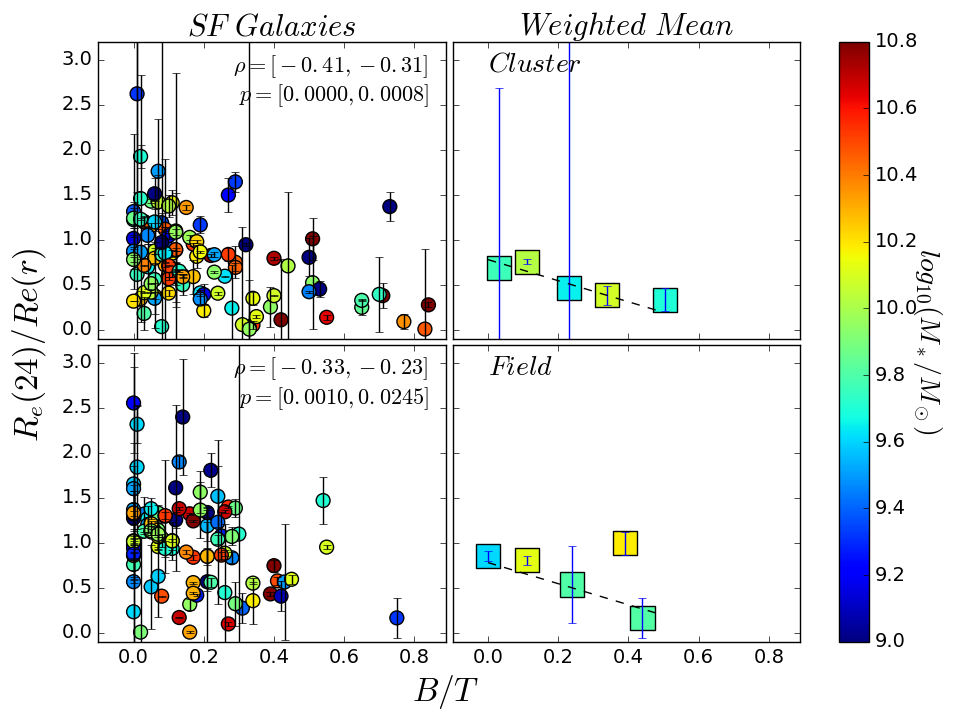

In [88]:
s.plotsizeBTblue()

This shows $R_e(24)/R_e(r)$ vs. B/T for cluster and field galaxies.  The left panels show the values for individual galaxies.  The $\rho$ values indicates the 68% confidence interval for the Spearman rank correlation coeffienct, which I determine using Monte Carlo resampling.  The Monte Carlo code assumes that the errors reported by galfit for $R_e(24)$ are gaussion - this is not likely to be true, but it's better than nothing.

Correlation is less significant among field galaxies.

## Color

* Need to see if galaxies with smaller Re(24)/Re(r) are redder.
* could make a plot with Re(24)/Re(r) vs NUV - r, or u-r, or g-r


**Results:**

No obvious correlation between size ratio and color


mean (median) = -0.37 (-0.37), std =  0.05
confidence interval from sorted list of MC fit values:
lower = -0.41 (-0.41), upper = -0.32 (-0.32)
probability that distribution of slopes is normal =  0.12
[3 2 3 1 2 1 2 3 2 2 2 2 1 4 1 2 3 0 2 2 3 1 1 0 2 2 1 3 1 2 2 0 1 2 1 3 1
 2 1 2 3 1 3 1 1 2 1 3 2 2 2 0 2 2 0 2 1 2 2 2 0 4 2 3 3 2 1 3 0 3 0 0 2 2
 2 3 1 1 1 0 3 2 0 3 1 2 1 2 1 0 0 3 1 1 2 1 0 1 3 1 1 1 0 1 0 0 1 3 0 0 1
 1 1]
weighted median =  0.722924386887
weighted median =  0.630146856235
weighted median =  0.702970646664
weighted median =  0.489679955259
weighted median =  0.292992565446
best-fit coefficients for cluster =  [-0.12504132  0.94286684]
mean (median) = -0.25 (-0.25), std =  0.05
confidence interval from sorted list of MC fit values:
lower = -0.29 (-0.29), upper = -0.19 (-0.20)
probability that distribution of slopes is normal =  0.46
[ 1  1  4  0  3  2  1  3  0  1  1  2  2  0  1  1  1  1  1  2  1  2  1  2  1
  1  1  0  2  0  1  0  1  1  2  1  1  2  1  1  0  1  0  4 

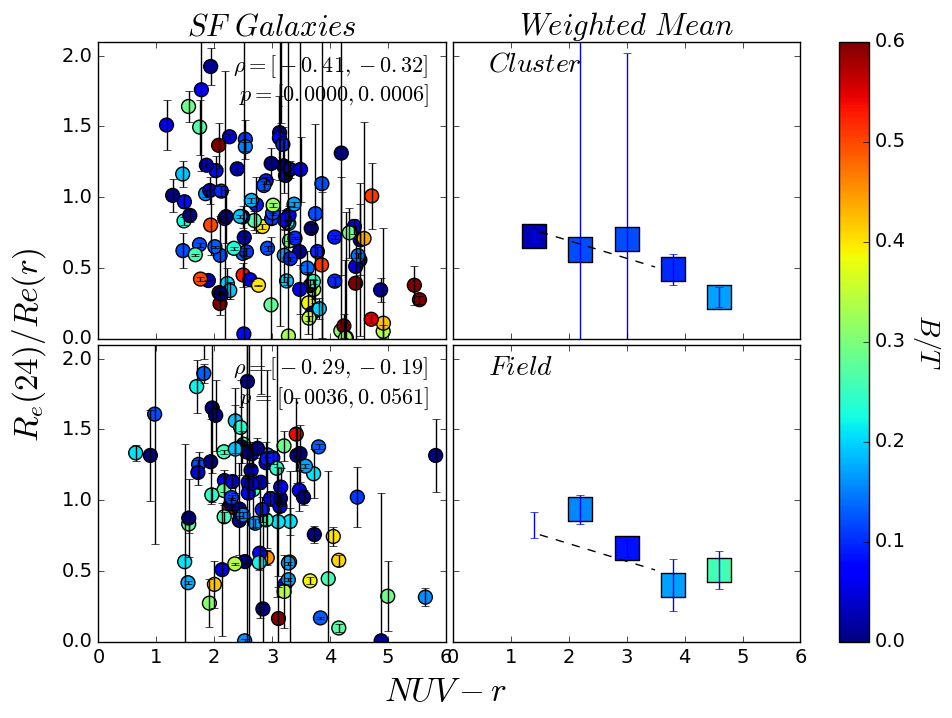

In [89]:
s.plotsizeNUVrblue()

In [85]:
spearman(s.sizeratio[s.sampleflag],s.ur[s.sampleflag])

Spearman Rank Test:
rho =  -0.32
p-vale = 0.00000 (prob that samples are uncorrelated)


(-0.32423610985279083, 1.5794126966284239e-06)

## Color-Color Plots

In [6]:
s.plotcolorcolor3panel()

Fraction of cluster galaxies in green valley =  0.24+  0.04/- 0.05(24/102)
Fraction of exterior galaxies in green valley =  0.12+  0.03/- 0.04(13/107)

size of cluster galaxies in green valley = 0.48 +/-0.06 (0.45)
size of exterior galaxies in green valley = 0.73 +/-0.12 (0.74)

Fraction of dusty cluster galaxies =  0.25+  0.05/- 0.05(26/102)
ave(median) size of dusty cluster galaxies =  0.59 ( 0.47)

Fraction of dusty exterior galaxies =  0.21+  0.04/- 0.05(23/107)
ave(median) size of dusty exterior galaxies =  0.83 ( 0.76)


<string>:6792: RuntimeWarning: invalid value encountered in greater
<string>:6793: RuntimeWarning: invalid value encountered in greater
<string>:6800: RuntimeWarning: invalid value encountered in greater
<string>:6801: RuntimeWarning: invalid value encountered in greater


## Partial Correlation Analysis

Trying to call R functions from python using rpy2.  This will allow me to better document the procedure and results because I can include it in this notebook!

**Need to implement error analysis here.  Use monte carlo method again.**

In the end, it might be better to remove galaxies with large errors associated with 24um size.  They are probably just adding noise.

In [1]:
#%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 9. --diskonly 0
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py 

Running on Rose's mac pro
Running on Rose's mac pro or laptop
Running on Rose's mac pro or laptop
--------------------------------------------------
Date: Tue Aug  1 16:32:05 2006
User: elbaz
Host: 251-198.ipac.caltech.edu
--------------------------------------------------
Format: 9
Architecture: ppc
Operating System: darwin
IDL Version: 6.1
--------------------------------------------------
Successfully read 14 records of which:
 - 10 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - nulnu_iras25 [<type 'numpy.ndarray'>]
 - nulnuinlsun [<type 'numpy.ndarray'>]
 - nulnu_iras100 [<type 'numpy.ndarray'>]
 - nulnu_iras12 [<type 'numpy.ndarray'>]
 - lir_sanders [<type 'numpy.ndarray'>]
 - nulnu_iras60 [<type 'numpy.ndarray'>]
 - lir [<type 'numpy.ndarray'>]
 - nulnu_lw3 [<type 'numpy.ndarray'>]
 - nulnu_lw2 [<type 'numpy.ndarray'>]
 - lambda [<type 'numpy.ndarray'>]
---

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:382: RuntimeWarning: invalid value encountered in divide
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:382: RuntimeWarning: invalid value encountered in log10
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:382: RuntimeWarning: invalid value encountered in greater
  self.AGNKAUFF= ((log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (log10(self.s.N2FLUX/self.s.HAFLUX) > 0.))
/Users/rfinn

1800 1800
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%


/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:540: RuntimeWarning: divide by zero encountered in divide
  self.galfitflag = (self.s.fcmag1 > .1)  & ~self.nerrorflag & (self.sb_obs < 20.) & (self.s.fcre1/self.s.fcre1err > .5)#20.)
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:540: RuntimeWarning: invalid value encountered in divide
  self.galfitflag = (self.s.fcmag1 > .1)  & ~self.nerrorflag & (self.sb_obs < 20.) & (self.s.fcre1/self.s.fcre1err > .5)#20.)
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:540: RuntimeWarning: invalid value encountered in greater
  self.galfitflag = (self.s.fcmag1 > .1)  & ~self.nerrorflag & (self.sb_obs < 20.) & (self.s.fcre1/self.s.fcre1err > .5)#20.)
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:580: RuntimeWarning: divide by zero encountered in divide
  self.c90=self.s.FLUX_RADIUS2/self.s.fcre1
/Users/rfinn/Dropbox/pythonCode/LCSanalyzeblue.py:580: RuntimeWarning: invalid value encountered in divide
  self.c90=self.s.FLUX_RADIUS2/self.s.fc

1147 1147
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


In [27]:
ppcor = rpackages.importr('ppcor')
pcor = robjects.r['pcor'] # can calculate partial correlation coeff for matrix
pcor_test = robjects.r['pcor.test']
print robjects.r['pi']

[1] 3.141593



In [36]:
flag = s.sampleflag & (s.s.SIGMA_5 != 0)#& ~s.membflag
rmass = robjects.FloatVector(s.logstellarmass[flag])
rsize = robjects.FloatVector(s.sizeratio[flag])
rBT = robjects.FloatVector(s.s.B_T_r[flag])
#rBT = robjects.FloatVector(s.s.SERSIC_N[flag])
rrad = robjects.FloatVector(s.s.DR_R200[flag])
rsigma5 = robjects.FloatVector(s.s.SIGMA_5[flag])
rsigma10 = robjects.FloatVector(s.s.SIGMA_10[flag])
rsigmaNN = robjects.FloatVector(s.s.SIGMA_NN[flag])
print sum(flag)



224


In [33]:
print rBT[0:10]

 [1] 0.30 0.08 0.04 0.00 0.12 0.12 0.41 0.13 0.25 0.34



In [37]:
print 'Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius'
t = pcor_test(rsize,rBT,[rsigma5,rmass,rrad],method='spearman')
print t
print 'RESULT: size and B/T are strongly correlated'
print ''
print ''
print '** Partial Correlation between size and M, controlling for B/T, Sigma_5**'
t = pcor_test(rsize,rmass,[rBT,rsigma5],method='spearman')
print t
print 'RESULT: size and stellar mass are NOT correlated'
print ''
print ''

print '** Partial Correlation between size and Sigma_5, controlling for B/T, M**'
t = pcor_test(rsize,rsigma5,[rBT,rmass],method='spearman')
print t
print 'RESULT: size and Sigma_5 are strongly correlated'




Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius
    estimate      p.value statistic   n gp   Method
1 -0.2201279 0.0009863834  -3.33951 224  3 spearman

RESULT: size and B/T are strongly correlated


** Partial Correlation between size and M, controlling for B/T, Sigma_5**
    estimate      p.value statistic   n gp   Method
1 -0.2330556 0.0004631983 -3.554656 224  2 spearman

RESULT: size and stellar mass are NOT correlated


** Partial Correlation between size and Sigma_5, controlling for B/T, M**
   estimate      p.value statistic   n gp   Method
1 -0.285767 1.530078e-05 -4.423054 224  2 spearman

RESULT: size and Sigma_5 are strongly correlated


In [35]:
print '** Partial Correlation between size and M, controlling for B/T, Sigma_10**'
t = pcor_test(rsize,rmass,[rBT,rsigma10],method='spearman')
print t
print 'RESULT: size and stellar mass are NOT correlated'
print ''
print ''
print 'Partial Correlation between size and B/T, controlling for Sigma_10, M, and projected radius'
t = pcor_test(rsize,rBT,[rsigma10,rmass,rrad],method='spearman')
print t
print 'RESULT: size and B/T are strongly correlated'
print ''
print ''
print '** Partial Correlation between size and Sigma_10, controlling for B/T, M**'
t = pcor_test(rsize,rsigma10,[rBT,rmass],method='spearman')
print t
print 'RESULT: size and Sigma_10 are strongly correlated (more so than sigma_5)'
print ''
print ''
print '** Partial Correlation between size and Sigma_NN, controlling for B/T, Sigma_10 **'
t = pcor_test(rsize,rsigmaNN,[rBT,rsigma10],method='spearman')
print t
print 'RESULT: size and Sigma_NN are weakly correlated (even after controlling for Sigma_10 and B/T)'



** Partial Correlation between size and M, controlling for B/T, Sigma_10**
    estimate      p.value statistic   n gp   Method
1 -0.2345594 0.0004244055 -3.578923 224  2 spearman

RESULT: size and stellar mass are NOT correlated


Partial Correlation between size and B/T, controlling for Sigma_10, M, and projected radius
   estimate     p.value statistic   n gp   Method
1 -0.220459 0.000968702  -3.34479 224  3 spearman

RESULT: size and B/T are strongly correlated


** Partial Correlation between size and Sigma_10, controlling for B/T, M**
    estimate      p.value statistic   n gp   Method
1 -0.3035507 4.096482e-06 -4.725348 224  2 spearman

RESULT: size and Sigma_10 are strongly correlated (more so than sigma_5)


** Partial Correlation between size and Sigma_NN, controlling for B/T, Sigma_10 **
    estimate   p.value statistic   n gp   Method
1 0.09694959 0.1499366  1.444801 224  2 spearman

RESULT: size and Sigma_NN are weakly correlated (even after controlling for Sigma_10 and B/T

In [20]:
# how to get value back from robject
t[1][0]

0.18093689598715337

In [44]:
print 'RUNNING AGAIN WITHOUT COMA IN SAMPLE'
print ''
flag = nc.sampleflag & (nc.s.SIGMA_5 != 0)#& ~s.membflag
rmass = robjects.FloatVector(nc.logstellarmass[flag])
rsize = robjects.FloatVector(nc.sizeratio[flag])
rsizeerr = robjects.FloatVector(nc.sizeratioERR[flag])
rBT = robjects.FloatVector(nc.s.B_T_r[flag])
rBT = robjects.FloatVector(nc.s.SERSIC_N[flag])
rrad = robjects.FloatVector(nc.s.DR_R200[flag])
rsigma5 = robjects.FloatVector(nc.s.SIGMA_10[flag])

print '** Partial Correlation between size and M, controlling for B/T, Sigma_5**'
t = pcor_test(rsize,rmass,[rBT,rsigma5],method='spearman')
print t
print 'RESULT: size and stellar mass are NOT correlated'
print ''
print ''
print 'Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius'
t = pcor_test(rsize,rBT,[rsigma5,rmass,rrad],method='spearman')
print t
print 'RESULT: size and B/T are strongly correlated'
print ''
print ''
print '** Partial Correlation between size and Sigma_5, controlling for B/T, M**'
t = pcor_test(rsize,rsigma5,[rBT,rmass],method='spearman')
print t
print 'RESULT: size and Sigma_5 is 2-sigma correlated when coma is removed'



RUNNING AGAIN WITHOUT COMA IN SAMPLE

** Partial Correlation between size and M, controlling for B/T, Sigma_5**
    estimate    p.value statistic   n gp   Method
1 -0.1866125 0.01013747 -2.597517 191  2 spearman

RESULT: size and stellar mass are NOT correlated


Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius
    estimate     p.value statistic   n gp   Method
1 -0.2617793 0.000284645 -3.699193 191  3 spearman

RESULT: size and B/T are strongly correlated


** Partial Correlation between size and Sigma_5, controlling for B/T, M**
    estimate     p.value statistic   n gp   Method
1 -0.2039774 0.004873438 -2.849252 191  2 spearman

RESULT: size and Sigma_5 is 2-sigma correlated when coma is removed


### Monte Carlo Error Estimate 

In [38]:
#%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 9. --diskonly 0
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py  
ppcor = rpackages.importr('ppcor')
pcor = robjects.r['pcor'] # can calculate partial correlation coeff for matrix
pcor_test = robjects.r['pcor.test']


normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
1800 1800
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
1147 1147
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


In [53]:
def pcor_with_errors(x,y,yerr,z,Nmc = 1000,plotflag=False,method='spearman'):
    '''
    this is pretty costume to my specific needs in this paper.
    I am always looking to measure the correlation between X variable and size (Re24/Rer).
    so this function takes only y error
    
    need to pass in x,y,yerr, and z as robjects.FloatVector
    
    z is a list of variables to control for:
    z = [rsigma5,rmass,rrad]
    
    Nmc = number of monte carlo realizations.  default = 1000
    
    Returns: arrays coeff, pvalue that contain the cor cooef and p-value for each realization.
    '''

    ysim = np.zeros(Nmc,'f')
    coeff = np.zeros(Nmc,'f')
    pvalue = np.zeros(Nmc,'f')
    stat = np.zeros(Nmc,'f')
    for i in range(Nmc):
        ysim=np.random.normal(y,scale=yerr,size=len(y))
        #ysim = y
        rysim = robjects.FloatVector(ysim)
        t = pcor_test(x,rysim,z,method=method)
        coeff[i] = t[0][0]
        pvalue[i] = t[1][0]
        stat[i] = t[2][0]

    #print 'mean (median) = %5.2f (%5.2f), std = %5.2f'%(cave,np.median(rhosim),cstd)
    #print 'confidence interval from sorted list of MC fit values:'
    #print 'lower = %5.2f (%5.2f), upper = %5.2f (%5.2f)'%(lower,cave-cstd, upper,cave+cstd)
    
    if plotflag:
        #cave=np.mean(coeff)
        #cstd=np.std(coeff)
        #q1=50-34 # mean minus one std
        #lower=np.percentile(coeff,q1)
        #q2=50+34 # mean minus one std
        #upper=np.percentile(coeff,q2)
        #plt.figure(figsize=(10,4))
        #plt.subplot(1,2,1)
        #plt.hist(coeff,bins=10,normed=True)
        #plt.xlabel(r'$Corr Coeff \ \rho $')
        #plt.axvline(x=cave,ls='-',color='k')
        #plt.axvline(x=lower,ls='--',color='k')
        #plt.axvline(x=upper,ls='--',color='k')
        #plt.subplot(1,2,2)
        #plt.hist(np.log10(pvalue),bins=10,normed=True)
        #plt.xlabel(r'$\log_{10}(p \ value)$')
        plt.figure()
        plt.hexbin(coeff,np.log10(pvalue))
        plt.xlabel('$Corr \ Coeff$')
        plt.ylabel('$log_{10}(p-value)$')
        #plt.axhline(y=np.log10(1-.68),ls=':',color='r',lw=2)
        plt.axhline(y=np.log10(1-.95),ls='--',color='y',lw=2)
        plt.axhline(y=np.log10(1-.997),ls='--',color='r',lw=1)
        
        
    print 'mean,median, 68 percent confidence interval values:'
    print '\t cor coeff   = %4.2f (%4.2f) [%4.2f, %4.2f]'%(np.mean(coeff),np.median(coeff),np.percentile(coeff,16),np.percentile(coeff,84))
    print '\t p-value     = %4.2e (%4.2e) [%4.2e, %4.2e]'%(np.mean(pvalue),np.median(pvalue),np.percentile(pvalue,16),np.percentile(pvalue,84))
    print '\t statistic   = %5.4f (%5.4f) [%5.4f, %5.4f]'%(np.mean(stat),np.median(stat),np.percentile(stat,16),np.percentile(stat,84))
    #print 'mean,median, 68 percent confidence interval +/-:'
    #print '\t cor coeff   = %4.2f (%4.2f) [%4.2f, %4.2f]'%(np.mean(coeff),np.median(coeff),np.mean(coeff)-np.percentile(coeff,16),np.percentile(coeff,84)-np.mean(coeff))
    #print '\t p-value     = %4.2e (%4.2e) [%4.2e, %4.2e]'%(np.mean(pvalue),np.median(pvalue),np.mean(pvalue)-np.percentile(pvalue,16),np.percentile(pvalue,84)-np.mean(pvalue))
    #print '\t statistic   = %5.4f (%5.4f) [%5.4f, %5.4f]'%(np.mean(stat),np.median(stat),np.mean(stat)-np.percentile(stat,16),np.percentile(stat,84)-np.mean(stat))
    k,pnorm=normaltest(coeff)
    print 'probability that distribution of cor coef is normal = %5.4f'%(pnorm)
    k,pnorm=normaltest(pvalue)
    print 'probability that distribution of p-values is normal = %5.4f'%(pnorm)
    return coeff,pvalue,stat

In [16]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
1800 1800
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
1147 1147
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


In [70]:
flag = s.sampleflag & (s.s.SIGMA_5 != 0)#&
rmass = robjects.FloatVector(s.logstellarmass[flag])
rsize = robjects.FloatVector(s.sizeratio[flag])
rsizeerr = robjects.FloatVector(s.sizeratioERR[flag])
rBT = robjects.FloatVector(s.gim2d.B_T_r[flag])
#rBT = robjects.FloatVector(s.s.SERSIC_N[flag])
rrad = robjects.FloatVector(s.s.DR_R200[flag])
rsigma5 = robjects.FloatVector((s.s.SIGMA_5[flag]))
print sum(flag)

224


In [71]:
#rizeerr = robjects.FloatVector(np.ones(sum(flag),'f'))
print 'Partial Correlation between size and M, controlling for B/T, Sigma_5'
coeff,p,stat = pcor_with_errors(rmass,rsize,rsizeerr,[rBT,rsigma5],plotflag=False)


print 'RESULT: size and stellar mass are NOT correlated'
print ''
print ''
print 'Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius'
coeff,p,stat = pcor_with_errors(rBT,rsize,rsizeerr,[rsigma5,rmass],method='spearman',plotflag=False)
#print t
print 'RESULT: size and B/T are strongly correlated'
print ''
print ''
print 'Partial Correlation between size and Sigma_5, controlling for B/T, M'
coeff,p,stat = pcor_with_errors(rsigma5,rsize,rsizeerr,[rBT,rmass],method='spearman',plotflag=False)
#print t
print 'RESULT: size and Sigma_5 are strongly correlated'


Partial Correlation between size and M, controlling for B/T, Sigma_5
mean,median, 68 percent confidence interval values:
	 cor coeff   = -0.17 (-0.17) [-0.20, -0.14]
	 p-value     = 2.28e-02 (1.21e-02) [2.88e-03, 3.87e-02]
	 statistic   = -2.5356 (-2.5291) [-3.0143, -2.0796]
probability that distribution of cor coef is normal = 0.4812
probability that distribution of p-values is normal = 0.0000
RESULT: size and stellar mass are NOT correlated


Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius
mean,median, 68 percent confidence interval values:
	 cor coeff   = -0.29 (-0.29) [-0.33, -0.26]
	 p-value     = 1.24e-04 (1.01e-05) [6.04e-07, 1.03e-04]
	 statistic   = -4.5413 (-4.5205) [-5.1406, -3.9562]
probability that distribution of cor coef is normal = 0.1324
probability that distribution of p-values is normal = 0.0000
RESULT: size and B/T are strongly correlated


Partial Correlation between size and Sigma_5, controlling for B/T, M
mean,median, 68 

In [66]:
flag = s.sampleflag  & (s.s.SIGMA_5 != 0)#& ~s.membflag
rmass = robjects.FloatVector(s.logstellarmass[flag])
rsize = robjects.FloatVector(s.sizeratio[flag])
rsizeerr = robjects.FloatVector(s.sizeratioERR[flag])
rBT = robjects.FloatVector(s.gim2d.B_T_r[flag])
#rBT = robjects.FloatVector(s.s.SERSIC_N[flag])
rrad = robjects.FloatVector(s.s.DR_R200[flag])
rsigma5 = robjects.FloatVector((s.s.SIGMA_5[flag]))
print (sum(flag))

224


In [67]:
print 'IF WE LIMIT SAMPLE TO GALAXIES WITH B/T FITS'

#rizeerr = robjects.FloatVector(np.ones(sum(flag),'f'))
print 'Partial Correlation between size and M, controlling for B/T, Sigma_5'
coeff,p,stat = pcor_with_errors(rmass,rsize,rsizeerr,[rBT,rsigma5],plotflag=False)


print 'RESULT: size and stellar mass are NOT correlated'
print ''
print ''
print 'Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius'
coeff,p,stat = pcor_with_errors(rBT,rsize,rsizeerr,[rsigma5,rmass],method='spearman',plotflag=False)
#print t
print 'RESULT: size and B/T are strongly correlated'
print ''
print ''
print 'Partial Correlation between size and Sigma_5, controlling for B/T, M'
coeff,p,stat = pcor_with_errors(rsigma5,rsize,rsizeerr,[rBT,rmass],method='spearman',plotflag=False)
#print t
print 'RESULT: size and Sigma_5 are strongly correlated'


IF WE LIMIT SAMPLE TO GALAXIES WITH B/T FITS
Partial Correlation between size and M, controlling for B/T, Sigma_5
mean,median, 68 percent confidence interval values:
	 cor coeff   = -0.17 (-0.17) [-0.20, -0.14]
	 p-value     = 2.61e-02 (1.28e-02) [2.87e-03, 4.44e-02]
	 statistic   = -2.4981 (-2.5088) [-3.0152, -2.0214]
probability that distribution of cor coef is normal = 0.3342
probability that distribution of p-values is normal = 0.0000
RESULT: size and stellar mass are NOT correlated


Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius
mean,median, 68 percent confidence interval values:
	 cor coeff   = -0.29 (-0.29) [-0.33, -0.26]
	 p-value     = 1.42e-04 (8.63e-06) [5.35e-07, 1.21e-04]
	 statistic   = -4.5364 (-4.5562) [-5.1662, -3.9136]
probability that distribution of cor coef is normal = 0.1813
probability that distribution of p-values is normal = 0.0000
RESULT: size and B/T are strongly correlated


Partial Correlation between size and Sig

In [72]:
flag = nc.sampleflag & (nc.s.SIGMA_5 != 0)#& ~s.membflag
rmass = robjects.FloatVector(nc.logstellarmass[flag])
rsize = robjects.FloatVector(nc.sizeratio[flag])
rsizeerr = robjects.FloatVector(nc.sizeratioERR[flag])
rBT = robjects.FloatVector(nc.gim2d.B_T_r[flag])
#rBT = robjects.FloatVector(nc.s.SERSIC_N[flag])
rrad = robjects.FloatVector(nc.s.DR_R200[flag])
rsigma5 = robjects.FloatVector((nc.s.SIGMA_5[flag]))


In [73]:

print 'REPEATING WITHOUT COMA' 

#rizeerr = robjects.FloatVector(np.ones(sum(flag),'f'))
print 'Partial Correlation between size and M, controlling for B/T, Sigma_5'
coeff,p,stat = pcor_with_errors(rmass,rsize,rsizeerr,[rBT,rsigma5],plotflag=False)


print 'RESULT: size and stellar mass are NOT strongly correlated'
print ''
print ''
print 'Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius'
coeff,p,stat = pcor_with_errors(rBT,rsize,rsizeerr,[rsigma5,rmass],method='spearman',plotflag=False)
#print t
print 'RESULT: size and B/T are strongly correlated'
print ''
print ''
print 'Partial Correlation between size and Sigma_5, controlling for B/T, M'
coeff,p,stat = pcor_with_errors(rsigma5,rsize,rsizeerr,[rBT,rmass],method='spearman',plotflag=False)
#print t
print 'RESULT: size and Sigma_5 are not strongly correlated'


REPEATING WITHOUT COMA
Partial Correlation between size and M, controlling for B/T, Sigma_5
mean,median, 68 percent confidence interval values:
	 cor coeff   = -0.14 (-0.14) [-0.18, -0.10]
	 p-value     = 8.49e-02 (5.07e-02) [1.26e-02, 1.59e-01]
	 statistic   = -1.9673 (-1.9664) [-2.5186, -1.4143]
probability that distribution of cor coef is normal = 0.0312
probability that distribution of p-values is normal = 0.0000
RESULT: size and stellar mass are NOT strongly correlated


Partial Correlation between size and BT, controlling for Sigma_5, M, and projected radius
mean,median, 68 percent confidence interval values:
	 cor coeff   = -0.28 (-0.28) [-0.32, -0.24]
	 p-value     = 9.35e-04 (1.09e-04) [8.48e-06, 1.04e-03]
	 statistic   = -3.9657 (-3.9531) [-4.5798, -3.3305]
probability that distribution of cor coef is normal = 0.1760
probability that distribution of p-values is normal = 0.0000
RESULT: size and B/T are strongly correlated


Partial Correlation between size and Sigma_5, control

** Yay!  This gives the same results as when running R studio!!!**

The right thing to do is to run pcor on the matrix of mass, size, BT, sigma5, and projected radius.  And anything else that might affect size???

can't figure out how to implement this using rpy2, so skipping for now.

Below are things I've tried but didn't work.

In [ ]:
data = np.array([s.sizeratio[flag],s.s.B_T_r[flag]])
d = robjects.FloatVector(data)
data.shape
print data[0,3]
print data

In [ ]:
data_matrix = robjects.r['matrix'](data,nrow = 2)#,rrad,rsigma5,rmass], nrow = 5)
print data_matrix

In [ ]:
pc = pcor(data_matrix, method = 'spearman')

### Effect of Mass Cut

Wondering why I need to have a mass cut at all as long as the field and cluster samples are comparable.  What is the effect of having mass cut > 9 vs mass cut > 9.75?

If mass cut is increased to 9.75, then we lose any significant correlation between size and B/T and/or size and environment.  I'll check the R code as well to see.

Partial correlation coefficient analysis indicates that the size-B/T correlation is still significant, but a residual correlation between size and environment is not detected.

So, which is right.  What about 9.5?
* size/BT is greater than 3sigma
* size/env is marginal

What about 9.3?
* size/BT is greater than 3sigma
* size/env is > 2 sigma but less than 3 sigma

mass > 9
* size/BT is greater than 3sigma
* size/env is close to 3 sigma

mass > 8
* size/BT is greater than 3sigma
* size/env is greater than 3 sigma

**RESULT**
* As mass cut decreases, the an environmental effect on size is detected.  
* Is this a systematic that is introduced because of incomplete mass sampling in higher-z clusters?  Even if field and cluster samples are mass-matched and have comparable distributions of B/T?
* Or, does this indicate that lower-mass galaxies are more affected by environment, as expected from analytic and numerical models?
* *I don't understand how (1) we always detect a significant different b/w cluster and field galaxies according to the histogram of sizes, yet (2) we sometimes don't detect an environmental effect in the partial correlation coeffient analysis if the field and cluster samples are well matched in terms of B/T.*
    * I suppose the comparison done within the plotsizehist does not account for errors.  But the signifance is so high, I can't believe it just goes away.
    * maybe sigma_5 is not providing a good means to distinguish field and cluster.
    * ALSO - correlation is looking for a correlation, whereas the KS test is looking for differences in populations.  For example, if the environmental effect was a step function, the correlation might be low, but the two populations could be significantly different.

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  no_coma
KS test comparing members and field
KS Test:
D =   0.17
p-vale = 0.26540 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.90
p-vale = 0.90378 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.22
p-vale = 0.12286 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.70
p-vale = 0.16992 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.27
p-vale = 0.01129 (prob that samples are from same distribution)
Anderson-Dar

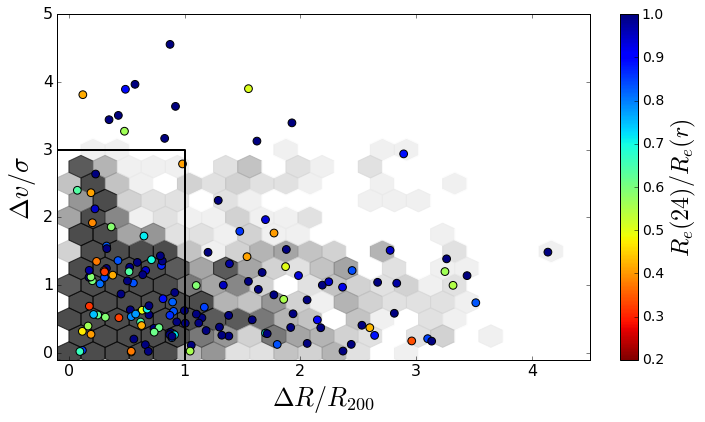

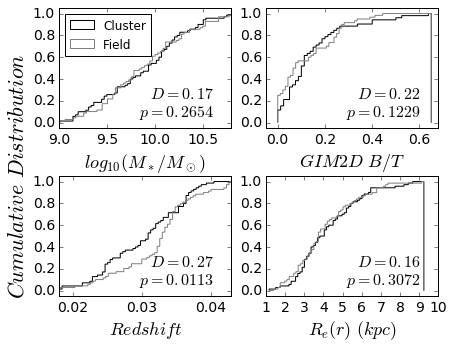

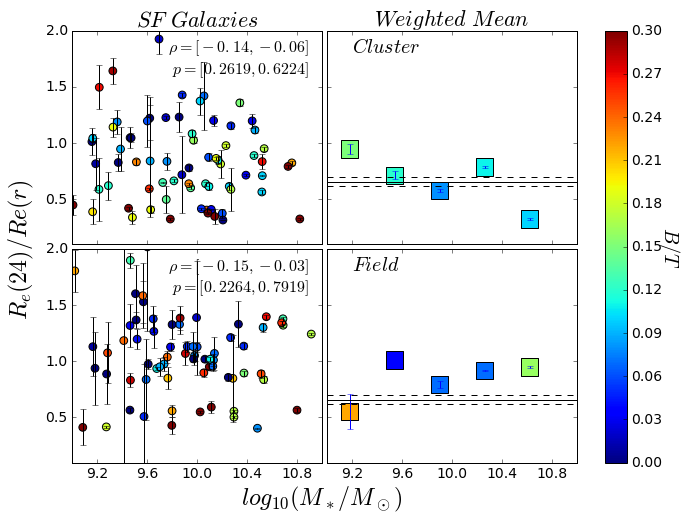

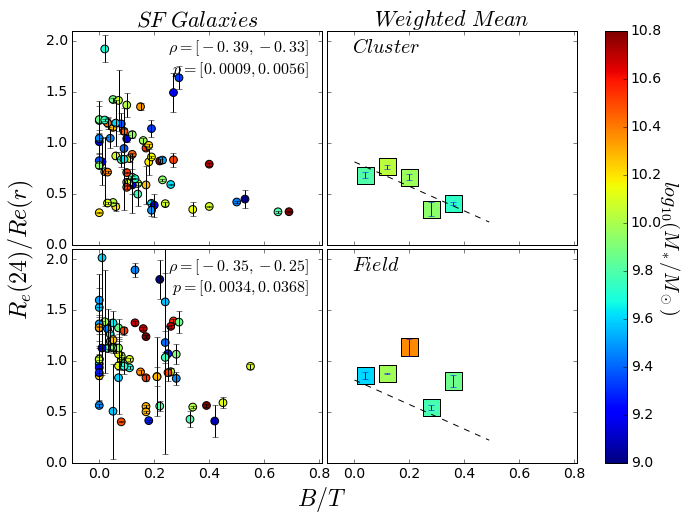

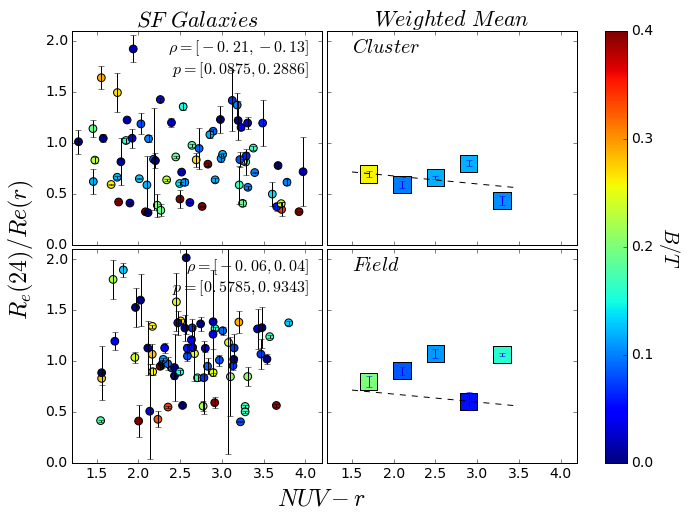

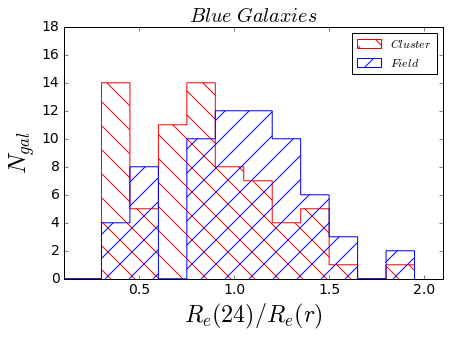

In [195]:
# here is min mass = 9.
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 9.
makemoneyplots()

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  no_coma
KS test comparing members and field
KS Test:
D =   0.18
p-vale = 0.25671 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.62
p-vale = 0.67308 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.22
p-vale = 0.18427 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.25
p-vale = 0.26878 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.29
p-vale = 0.00824 (prob that samples are from same distribution)
Anderson-Dar

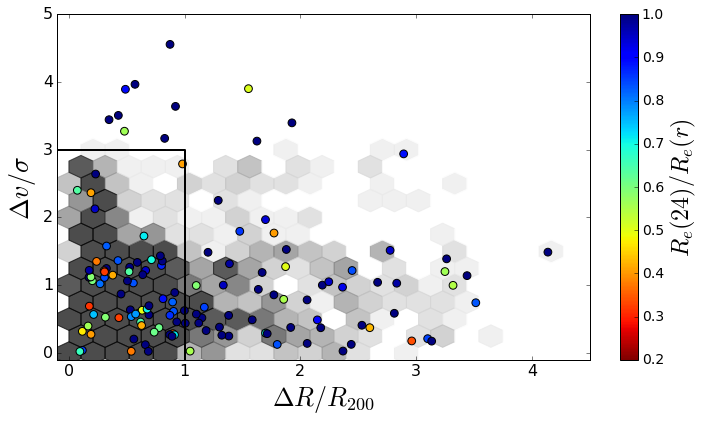

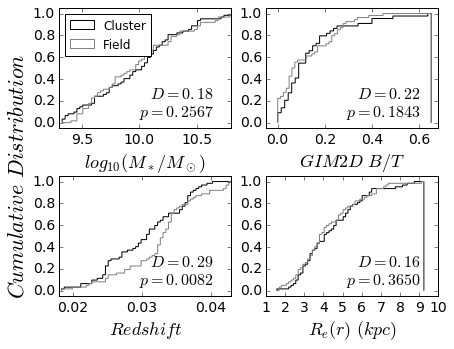

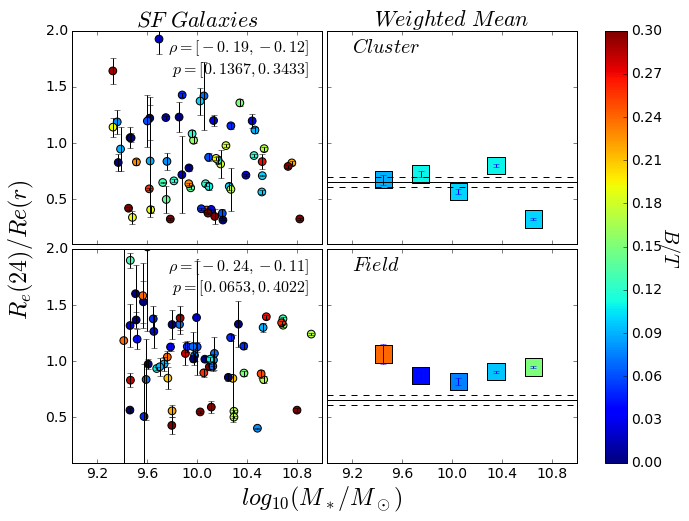

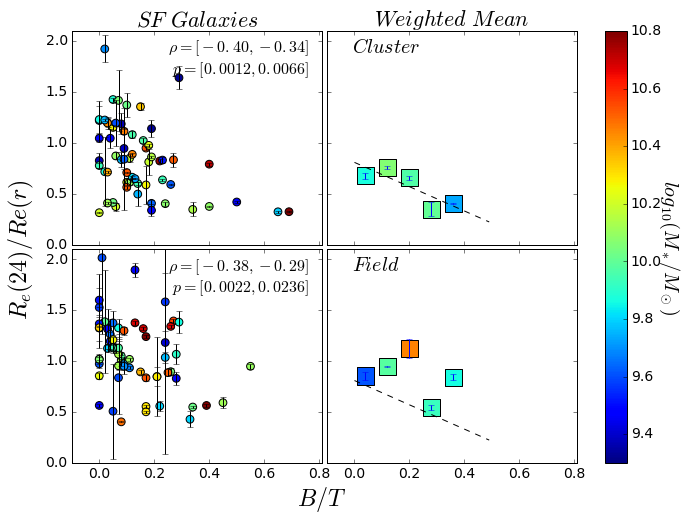

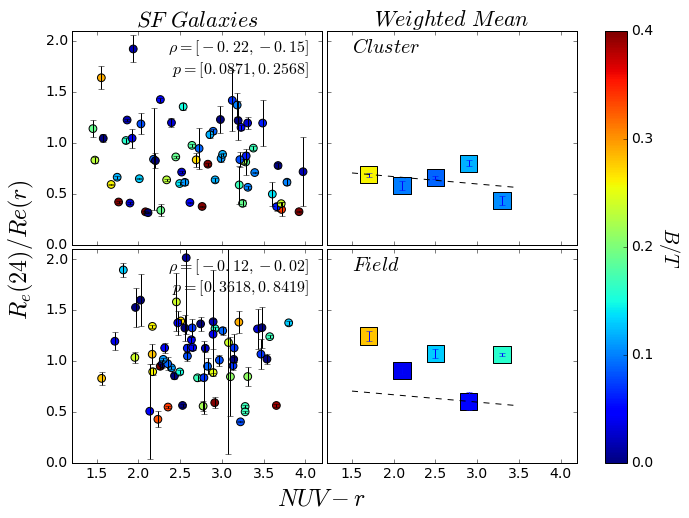

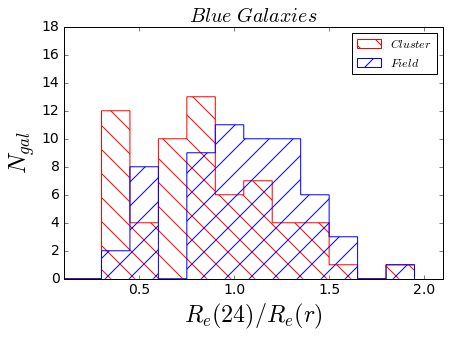

In [177]:
# here is min mass = 9.3
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 9.3
makemoneyplots()

%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  no_coma
KS test comparing members and field
KS Test:
D =   0.21
p-vale = 0.14262 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.11
p-vale = 0.31009 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.22
p-vale = 0.19736 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.14
p-vale = 0.30187 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.29
p-vale = 0.01781 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   2.08
p-v

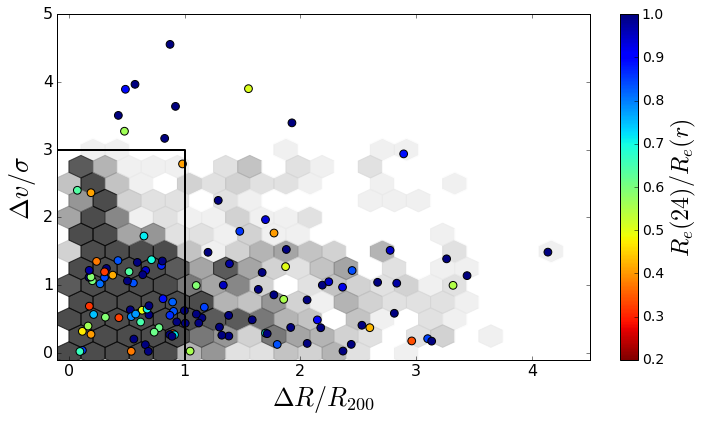

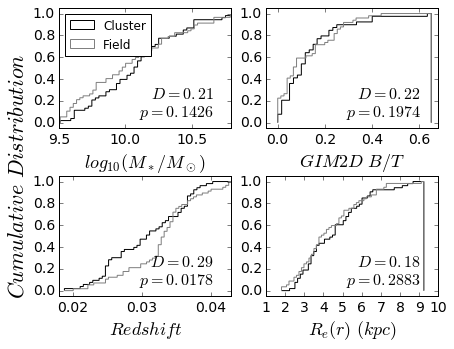

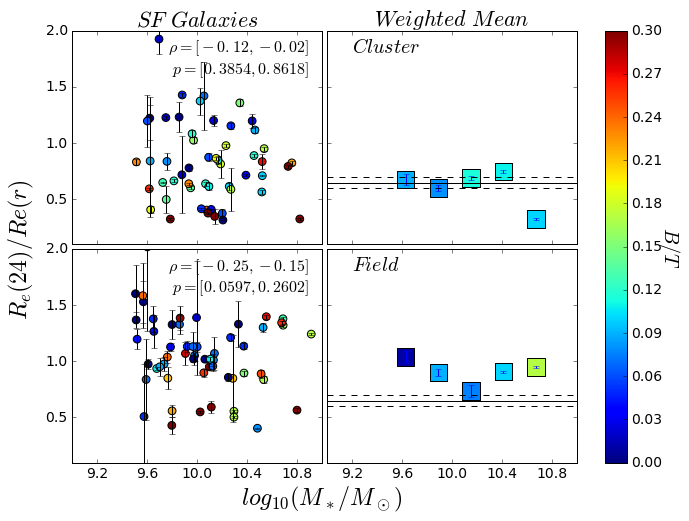

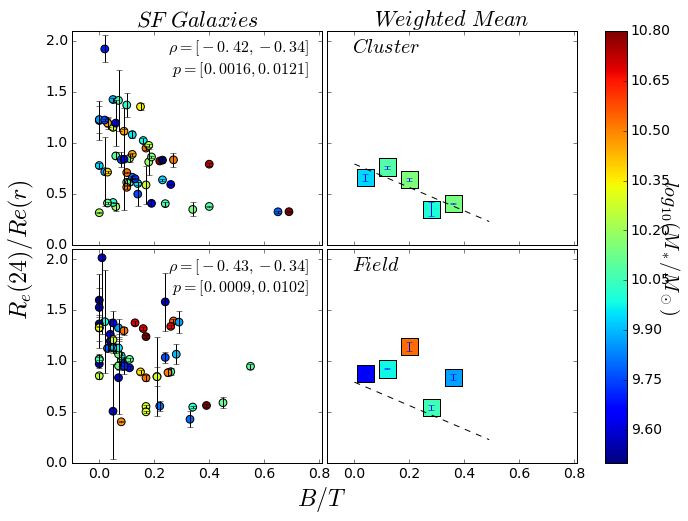

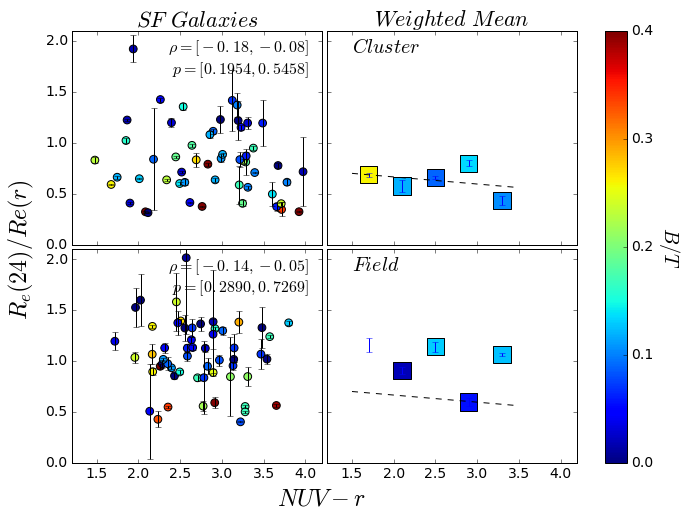

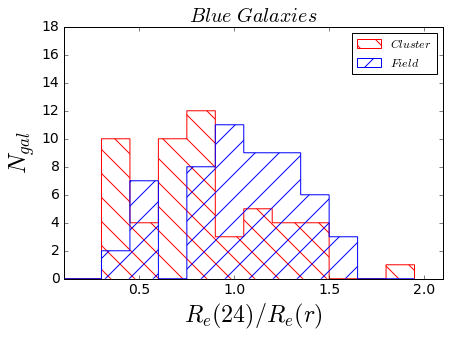

In [170]:
# here is min mass = 9.5
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py
makemoneyplots()

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  no_coma
KS test comparing members and field
KS Test:
D =   0.21
p-vale = 0.26293 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.83
p-vale = 0.83865 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.27
p-vale = 0.12842 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.22
p-vale = 0.43818 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.30
p-vale = 0.03424 (prob that samples are from same distribution)
Anderson-Dar

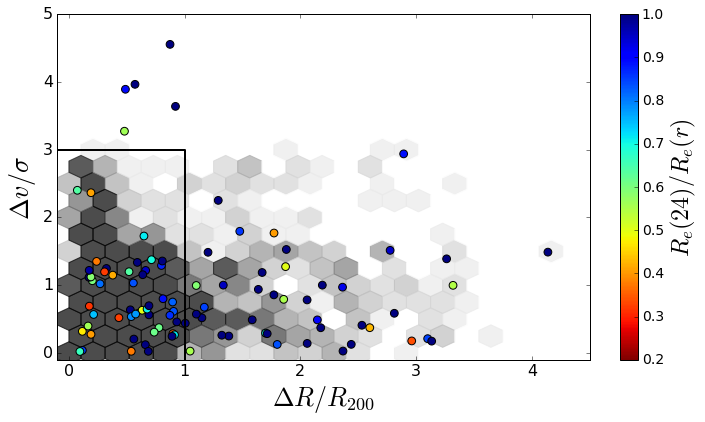

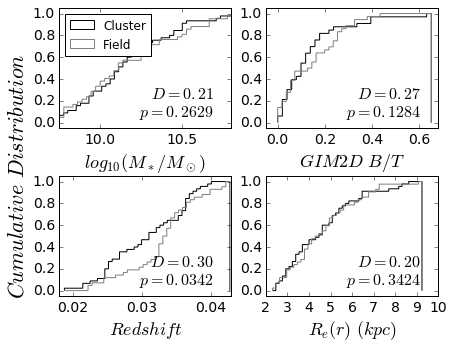

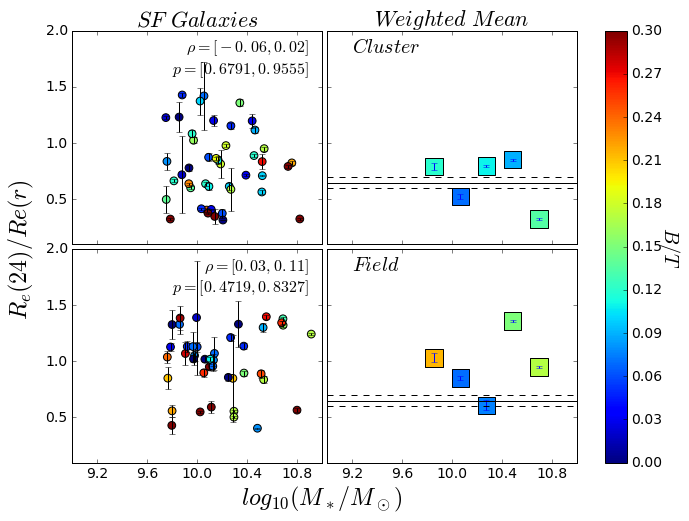

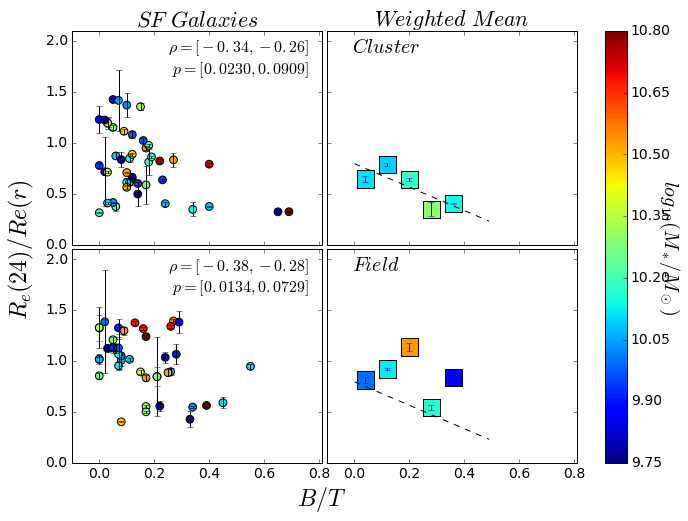

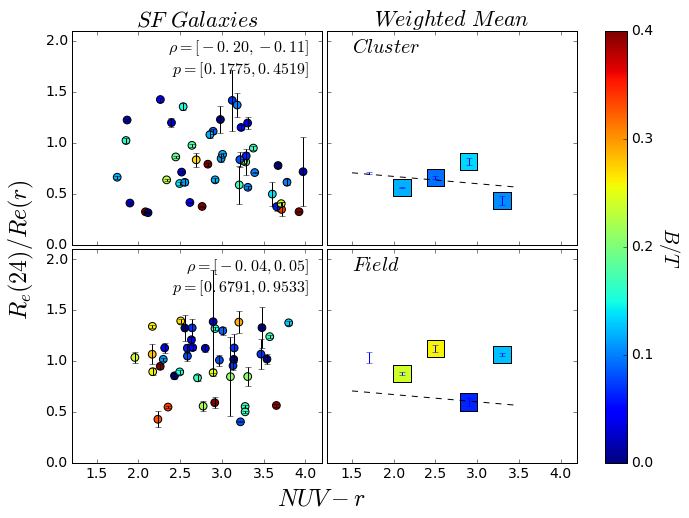

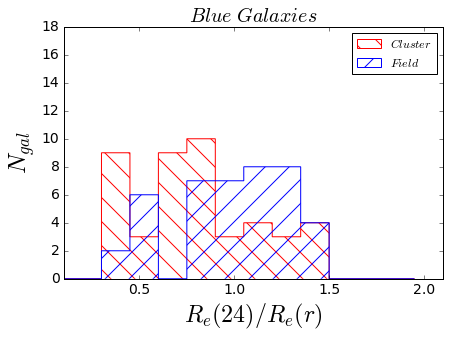

In [193]:
# here is min mass = 9.75
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 9.75
makemoneyplots()

## Low-mass galaxies

Compare field and cluster galaxies: $B/T < 0.1$, $9.5 < log(M*/M_\odot) < 9.8$
* Color
* SFR


In [144]:
flag = s.sampleflag & (s.logstellarmass > 9.) & (s.logstellarmass < 9.8) & (s.s.B_T_r < .2)
memb = flag & s.membflag
field = flag & ~s.membflag
# compare color
print 'comparing NUV-r color of cluster and field galaxies'
ks(s.NUVr[memb],s.NUVr[field])


comparing NUV-r color of cluster and field galaxies
KS Test:
D =   0.39
p-vale = 0.05175 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.78
p-vale = 0.15771 (prob that samples are from same distribution)


(0.39393940567970276, 0.051747381687164307)

How are sfrs different?  plot a cumulative dist

comparing SFR of cluster and field galaxies
KS Test:
D =   0.31
p-vale = 0.19643 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.47
p-vale = 0.21416 (prob that samples are from same distribution)


(0.31385281682014465, 0.19642908871173859)

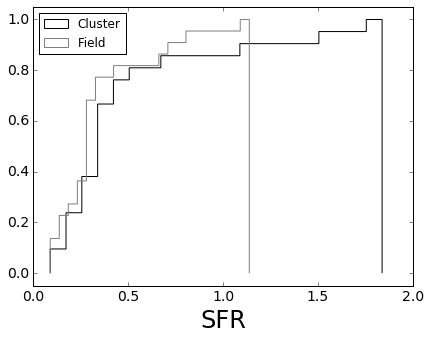

In [145]:
plt.figure()
t = plt.hist(s.SFR_BEST[memb],bins=sum(memb),cumulative=True,normed=True,color='k',histtype='step',label='Cluster')
#print sum(memb),sum(field),s.SFR_BEST[memb]
t = plt.hist(s.SFR_BEST[field],bins=sum(field),cumulative=True,normed=True,color='0.5',histtype='step',label='Field')
plt.xlabel('SFR')
plt.legend(loc = 'upper left')
plt.ylim(-.05,1.05)
# compare SFR
print 'comparing SFR of cluster and field galaxies'
ks(s.SFR_BEST[memb],s.SFR_BEST[field])

comparing u-r color of cluster and field galaxies
KS Test:
D =   0.48
p-vale = 0.00828 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.21
p-vale = 0.10259 (prob that samples are from same distribution)


(0.48268398642539978, 0.0082845417782664299)

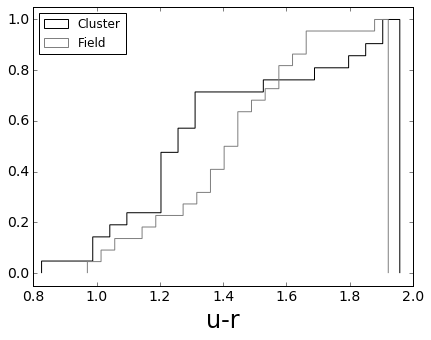

In [146]:
plt.figure()
t = plt.hist(s.ur[memb],bins=sum(memb),cumulative=True,normed=True,color='k',histtype='step',label='Cluster')
#print sum(memb),sum(field),s.SFR_BEST[memb]
t = plt.hist(s.ur[field],bins=sum(field),cumulative=True,normed=True,color='0.5',histtype='step',label='Field')
plt.xlabel('u-r')
plt.legend(loc = 'upper left')
plt.ylim(-.05,1.05)
print 'comparing u-r color of cluster and field galaxies'
ks(s.ur[memb],s.ur[field])


## Galfit Simulations

I decided to put these in a separate notebook.

## Sanity Checks that Won't Make the Paper

mean (median) = -0.29 (-0.29), std =  0.02
confidence interval from sorted list of MC fit values:
lower = -0.31 (-0.31), upper = -0.26 (-0.26)
probability that distribution of slopes is normal =  0.01


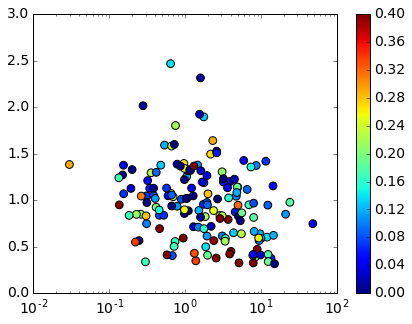

In [19]:
plt.figure()
flag = s.sampleflag
sp = plt.scatter(s.s.SIGMA_5[flag],s.sizeratio[flag],c=s.s.B_T_r[flag],s=60,vmin=0,vmax=.4)
plt.colorbar()
plt.gca().set_xscale('log')
t = spearman_with_errors(s.s.SIGMA_5[flag],s.sizeratio[flag],s.sizeratioERR[flag])

In [ ]:
s.plotsizesb()

At first glance, this seems disconcerting, but the two variables are correlated b/c I use Re(24) to calculate surface brightness.  So larger Re(24) should have fainter surface brightness.

## Strange Correlations with B/A

R partial correlation analysis shows some very strong correlations between B/A and parameters I would expect to be correlated.

    stellar mass
    SFR
    surface density
    NUV24 color - this one is not surprising
    

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  no_coma
KS test comparing members and field
KS Test:
D =   0.16
p-vale = 0.28257 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.95
p-vale = 0.95932 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.20
p-vale = 0.16289 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.91
p-vale = 0.13818 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.25
p-vale = 0.01642 (prob that samples are from same distribution)
Anderson-Dar

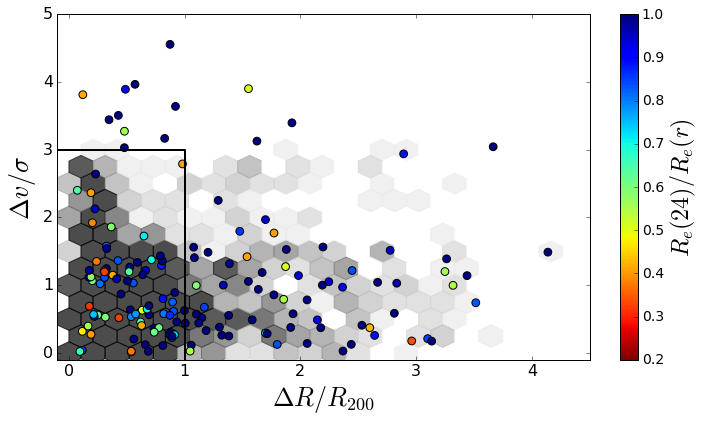

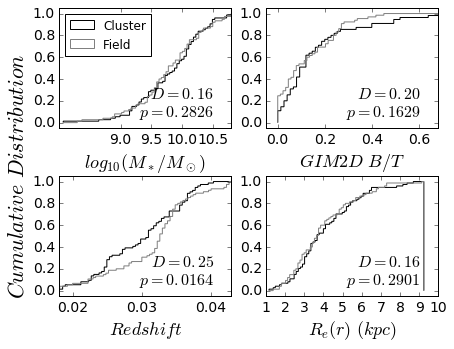

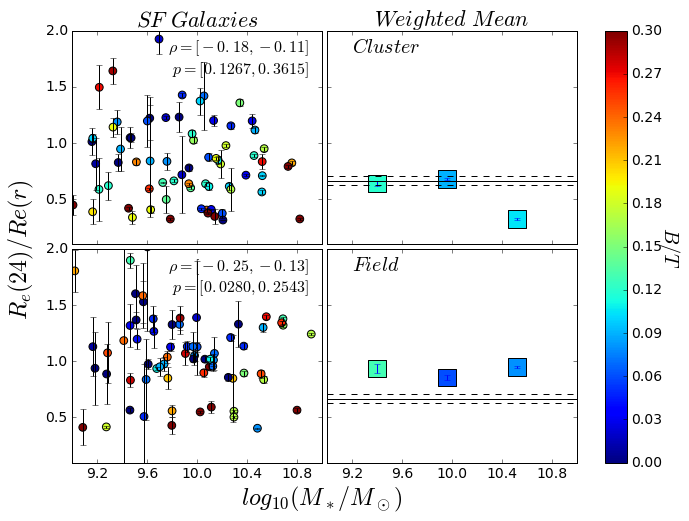

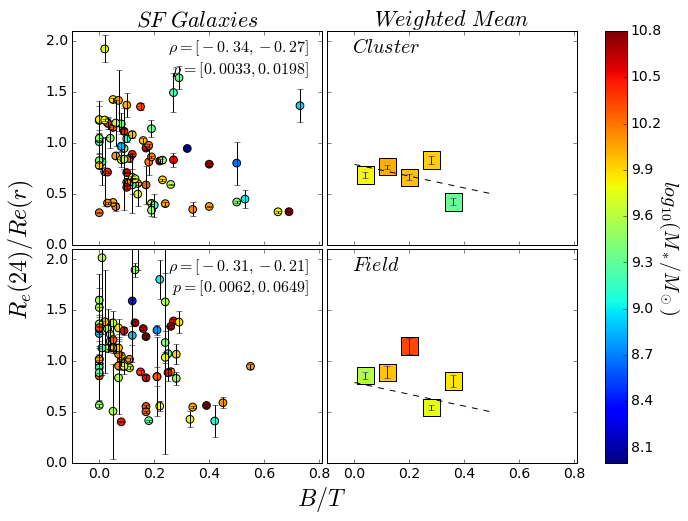

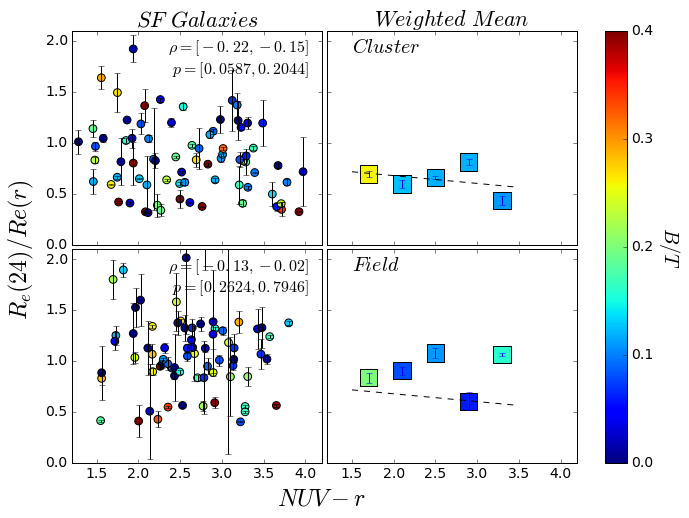

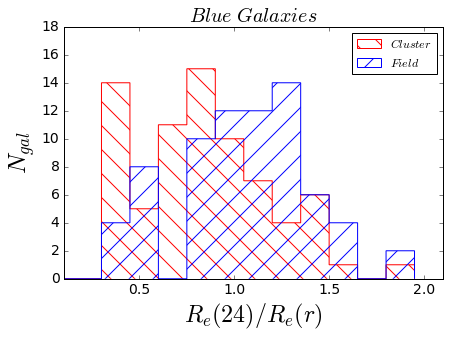

In [194]:
# here is min mass = 8.
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 7.
makemoneyplots()

Spearman Rank Test:
rho =  -0.03
p-vale = 0.46218 (prob that samples are uncorrelated)


(-0.033007102087140083, 0.46217957139015198)

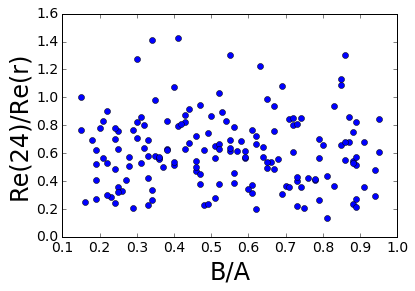

In [9]:
figure()
plot(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.SIZE_RATIO[s.sampleflag & ~s.agnflag],'bo')
xlabel('B/A')
ylabel('Re(24)/Re(r)')
spearman(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.SIZE_RATIO[s.sampleflag & ~s.agnflag])

In [ ]:
s.s.columns

In [ ]:
figure()
plot(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.FLUX24[s.sampleflag & ~s.agnflag],'bo')
xlabel('B/A')
ylabel('FLUX24')
spearman(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.FLUX24[s.sampleflag & ~s.agnflag])

In [ ]:
figure()
plot(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.NUVr[s.sampleflag & ~s.agnflag],'bo')
xlabel('B/A')
ylabel('NUV-r')
spearman(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.NUVr[s.sampleflag & ~s.agnflag])

## Quick Calculation to Find MIPS vs HST resolution comparison

I make the claim that the MIPS data is much lower resolution and SNR than typically used with galfit, but Greg said no.

Median redshift of my sample is $$z=0.03.$$  At this distance, there are $$0.604~kpc/arcsec.$$  The MIPS pixel size is 2.45 arcsec, so this means 1.48 kpc per resolution element.  

The pixel size of Hubble is 0.1 arcsec/pixel.  Therefore, to get 1.48 kpc per resolution element, we want to find the redshift where that angular diameter distance corresponds to $\sim$14.8 kpc/arcsec.  Using Ned Wright's cosmology calculator to figure this out.  Can't seem to get this to ever get that high.  The max value peaks around $z = 1.6$ at 8.615 kpc/arcsec.

So, it looks like my statement is correct.

Cluster: 
 	 N_SF  =  74, size =  0.86 ( 0.83) +/-  0.04 
 	 N_AGN =   4, size =  0.76 ( 0.72) +/-  0.12 
	 N_ALL =  78, size =  0.85 ( 0.83) +/-  0.04 


Near Field: 
 	 N_SF  =  58, size =  1.08 ( 1.04) +/-  0.05 
 	 N_AGN =   7, size =  0.96 ( 1.04) +/-  0.12 
	 N_ALL =  65, size =  1.07 ( 1.04) +/-  0.05 


Field: 
 	 N_SF  =  15, size =  1.24 ( 1.27) +/-  0.11 
 	 N_AGN =   2, size =  0.90 ( 0.90) +/-  0.11 
	 N_ALL =  17, size =  1.20 ( 1.25) +/-  0.10 




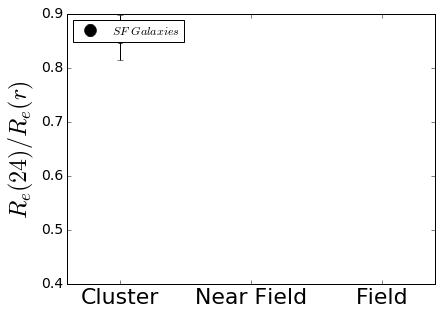

In [21]:
s.printsize()

## Some thought for analysis ##

We expect low B/T galaxies to have larger values of R24/Rd.  Can we find anything unusual about these galaxies?

What if we look at $B/T < 0.2$ and $R_{24}/R_d < .7$ field galaxies.  




In [29]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py --minmass 7.

normalizing by radius of disk
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
no_coma
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
ids not relevant for nc
PREFIX =  no_coma


In [31]:
flag = s.sampleflag & (s.sizeratio < .7) & ~s.membflag & (s.s.DELTA_V > 3.)
print sum(flag)
print s.s.NSAID[flag]

6

* 69537 - nearby companion
* 82170 - nearby companion
* 82172 - edge on, isolated
* 82210 - edge on, isolated, starburst
* 79551 - nearby companion, may have bar
* 80769 - distorted, may have bar

In [34]:
flag = s.sampleflag & (s.sizeratio < .7) & ~s.membflag & (s.s.DELTA_V < 3.) & (s.s.DR_R200 > 2.)
print sum(flag)
print s.s.NSAID[flag]

6
[70656 18296 82168 82188 80873 81018]


* 70656 - red, shells, nothing nearby
* 18296 - little dwarfing thing nearby
* 82168 - nearby galaxies, starburst, asymmetric
* 82188 - nothing obvious nearby, red
* 80873 - nothing obvious nearby, red
* 81018 - blue, dwarf, bar